# NBA Data Analysis
















## 1. Mount Google Drive into notebook



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. List files from Reseach folder


In [ ]:
%ls "/content/drive/My Drive/Colab Notebooks/Research Data" 

'g1 DEN Nuggets Data.gsheet'  'LD2 Data.csv'
'g1 LA Clippers Data.gsheet'  'LD3 Data.csv'
'Int. Times, LD1 Data.csv'    'LD4 Data.csv'
'Int. Times, LD2 Data.csv'     NBA-PBP-2018-2019.csv
'Int. Times, LD3 Data.csv'    'TOR 23s Data.csv'
'Int. Times, LD4 Data.csv'    'TOR 23s Data.gsheet'
'LD1 Data.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 3. Let's dive into Data Analysis

In [ ]:
# Read in my data 
nba = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Research Data/NBA-PBP-2018-2019.csv")

# Take a quick peek at data
nba.tail(30)

# Specificlly, take a quick side-by-side comparison of 'ShotType' and 'ShotOutcome'

# nba[['ShotType', 'ShotOutcome']].head(10) Alt. way
# nba.loc[:, ['ShotType', 'ShotOutcome']].head(10)

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,Shooter,ShotType,ShotOutcome,ShotDist,Assister,Blocker,FoulType,Fouler,Fouled,Rebounder,ReboundType,ViolationPlayer,ViolationType,TimeoutTeam,FreeThrowShooter,FreeThrowOutcome,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
613641,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,83,TOR,NaN,109,GSW,Offensive rebound by Team,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Team - GSW,offensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613642,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,83,TOR,NaN,109,GSW,D. Cousins makes free throw 2 of 2,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D. Cousins - GSW,make,2 of 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613643,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,65,TOR,K. Leonard misses 3-pt jump shot from 26 ft,109,GSW,NaN,106,K. Leonard - TOR,3-pt jump shot,miss,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613644,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,63,TOR,NaN,109,GSW,Defensive rebound by D. Cousins,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D. Cousins - GSW,defensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613645,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,46,TOR,NaN,109,GSW,D. Cousins makes 2-pt layup from 1 ft (assist ...,108,D. Cousins - GSW,2-pt layup,make,1.0,D. Green - GSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613646,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,37,TOR,Toronto full timeout,109,GSW,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613647,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,37,TOR,NaN,109,GSW,K. Looney enters the game for D. Cousins,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K. Looney - GSW,D. Cousins - GSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613648,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,28,TOR,P. Siakam makes 2-pt jump shot from 13 ft (ass...,111,GSW,NaN,108,P. Siakam - TOR,2-pt jump shot,make,13.0,K. Lowry - TOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613649,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,18,TOR,NaN,111,GSW,Personal foul by P. Siakam (drawn by S. Curry),108,NaN,NaN,NaN,NaN,NaN,NaN,personal,P. Siakam - TOR,S. Curry - GSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613650,/boxscores/201906130GSW.html,playoff,Oracle Arena Oakland California,June 13 2019,9:00 PM,TOR,4,18,TOR,NaN,111,GSW,S. Curry makes free throw 1 of 2,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S. Curry - GSW,make,1 of 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Let's split the NBA data by ShotType

In [ ]:
## Store rows of ONLY 3pt shots 
# nba[ (nba["ShotType"] == "3-pt jump shot") ] alt. way
three_pts = nba.loc[ nba['ShotType'].str.contains('3-pt', na=False)]

## Store rows of ONLY 2pt shots
# nba[ (nba["ShotType"] == "2-pt jump shot") ] alt. way
two_pts = nba.loc[ nba['ShotType'].str.contains('2-pt', na=False) ]

## Store rows of Free Throw shots (1pt)
# Because ShotType does not record 1pt, refer to "FreeThrow". If "FreeThrow" is not NaN, we know a free throw shot was taken (either make or miss)
one_pt = nba.loc[ pd.isnull(nba['FreeThrowOutcome']) == False]

# two_pts.shape[0]
# three_pts.shape[0]
# one_pt.shape[0]

# two_pts.head(20)
# three_pts.head(20)
# one_pt.head(20)

## 5. Let's split the NBA data by ShotType for LAC 2018-2019

In [ ]:
## Follow steps from previous cell, except now pick a HomeTeam to analyze for the year
LAC = nba.loc[(nba['HomeTeam'] == 'LAC') | (nba['AwayTeam'] == 'LAC')]

## Store rows of ONLY 3pt shots
# nba[ (nba["ShotType"] == "3-pt jump shot") ] alt. way
three_pts = LAC.loc[ (pd.isnull(LAC['HomePlay']) == False) & (LAC['ShotType'].str.contains('3-pt')) ]

## Store rows of ONLY 2pt shots
# nba[ (nba["ShotType"] == "2-pt jump shot") ] alt. way
two_pts = LAC.loc[ (pd.isnull(LAC['HomePlay']) == False) & (LAC['ShotType'].str.contains('2-pt')) ]

## Store rows of Free Throw shots (1pt)
# Because ShotType does not record 1pt, refer to "FreeThrow". If "FreeThrow" is not NaN, we know a free throw shot was taken (either make or miss)
one_pt = LAC.loc[ (pd.isnull(LAC['HomePlay']) == False) & (pd.isnull(LAC['FreeThrowOutcome']) == False) ]

# two_pts.shape[0]
# three_pts.shape[0]
# one_pt.shape[0]

# two_pts.head(20)
# three_pts.head(20)
# one_pt.head(20)
# LAC.tail(450)

## 6. Let's split the NBA data by ShotType for LAC vs DEN (regular game 1 OCT 17TH)

In [ ]:
# Gathering Data for LAC vs DEN and storing it in a dataframe titled 'LAC'
# Do same thing from previous cell, except now pick a HomeTeam, gameType, and Date
LAC = nba.loc[ (nba['HomeTeam'] == 'LAC') & (nba['GameType'] == 'regular') & (nba['Date'] == 'October 17 2018')]
LAC.shape
# LAC.head(20)

(511, 40)

## 7. Analyze HomeTeam LAC (all shots and then different ShotTypes)


In [ ]:
# Display the rows ONLY containing freethrows, 2pts and 3pts (all shots) taken by HomeTeam 
shots_all_LAC = LAC.loc[ (pd.isnull(LAC['ShotType']) == False) & (pd.isnull(LAC['HomePlay']) == False) | 
                      (pd.isnull(LAC['ShotType']) == True) & (pd.isnull(LAC['FreeThrowOutcome']) == False) & (pd.isnull(LAC['HomePlay']) == False),
                      ['SecLeft', 'ShotType', 'ShotOutcome', 'FreeThrowOutcome', 'HomePlay', 'HomeTeam'] ] 

# Display the rows ONLY containing 2pts and 3pts taken by HomeTeam
shots_all_23s_LAC = LAC.loc[ (pd.isnull(LAC['ShotType']) == False) & (pd.isnull(LAC['HomePlay']) == False),
                      ['SecLeft', 'ShotType', 'ShotOutcome', 'HomePlay', 'HomeTeam'] ] 

# Gather all 2pts made by HomeTeam and have it side by side with SecLeft 
shots_2s_LAC = shots_all_LAC.loc[ (pd.isnull(shots_all_LAC['ShotType']) == False) & (shots_all_LAC['ShotType'].str.contains('2-pt')),
                         ['SecLeft', 'ShotType', 'ShotOutcome', 'HomeTeam'] ]


# Gather all 3pts made by HomeTeam and have it side by side with SecLeft 
shots_3s_LAC = shots_all_LAC.loc[ (pd.isnull(shots_all_LAC['ShotType']) == False) & (shots_all_LAC['ShotType'].str.contains('3-pt')),
                         ['SecLeft', 'ShotType', 'ShotOutcome', 'HomeTeam'] ]

# Gather all 1pts made by HomeTeam and have it side by side with SecLeft 
shots_1s_LAC = shots_all_LAC.loc[pd.isnull(shots_all_LAC['FreeThrowOutcome']) == False, ['SecLeft', 'FreeThrowOutcome', 'HomeTeam'] ]


shots_2s_LAC.head(10)
# shots_3s_LAC.head(10)
# shots_1s_LAC.head(10)

shots_all_23s_LAC.tail(20) 
shots_all_23s_LAC.shape[0]

88

## 8. Analyze AwayTeam DEN (all shots and then different ShotTypes)

In [ ]:
# Display the rows ONLY containing freethrows, 2pts and 3pts (all shots) taken by AwayTeam 
shots_all_DEN = LAC.loc[ (pd.isnull(LAC['ShotType']) == False) & (pd.isnull(LAC['AwayPlay']) == False) | 
                      (pd.isnull(LAC['ShotType']) == True) & (pd.isnull(LAC['FreeThrowOutcome']) == False) & (pd.isnull(LAC['AwayPlay']) == False),
                      ['SecLeft', 'ShotType', 'ShotOutcome', 'FreeThrowOutcome', 'AwayPlay', 'AwayTeam'] ] 

# Display the rows ONLY containing 2pts and 3pts taken by AwayTeam 
shots_all_23s_DEN = LAC.loc[ (pd.isnull(LAC['ShotType']) == False) & (pd.isnull(LAC['AwayPlay']) == False),
                      ['SecLeft', 'ShotType', 'ShotOutcome', 'AwayPlay', 'AwayTeam'] ] 

# Gather all 2pts made by AwayTeam and have it side by side with SecLeft 
shots_2s_DEN = shots_all_DEN.loc[ (pd.isnull(shots_all_DEN['ShotType']) == False) & (shots_all_DEN['ShotType'].str.contains('2-pt')),
                         ['SecLeft', 'ShotType', 'ShotOutcome', 'AwayTeam'] ]

# Gather all 3pts made by AwayTeam and have it side by side with SecLeft 
shots_3s_DEN = shots_all_DEN.loc[ (pd.isnull(shots_all_DEN['ShotType']) == False) & (shots_all_DEN['ShotType'].str.contains('3-pt')),
                         ['SecLeft', 'ShotType', 'ShotOutcome', 'AwayTeam'] ]

# Gather all 1pts made by AwayTeam and have it side by side with SecLeft 
shots_1s_DEN = shots_all_DEN.loc[pd.isnull(shots_all_DEN['FreeThrowOutcome']) == False, ['SecLeft', 'FreeThrowOutcome', 'AwayTeam'] ]

# shots_2s_DEN.head(10)
# shots_3s_DEN.head(10)
# shots_1s_DEN.head(10)

# shots_all_23s_DEN.head(60)
shots_all_23s_DEN.shape[0]

87

## 9. Visualize ShotType data for LAC g1

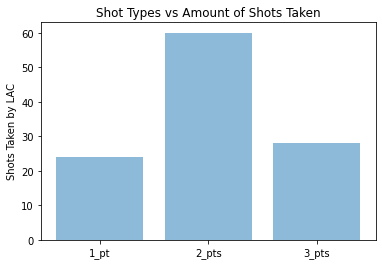

In [ ]:
x_axis = ('1_pt','2_pts','3_pts')
y_pos = np.arange(len(x_axis))
y_axis = [shots_1s_LAC.shape[0], shots_2s_LAC.shape[0], shots_3s_LAC.shape[0]]

plt.bar(y_pos, y_axis, align='center', alpha=0.5)
plt.xticks(y_pos, x_axis)
plt.ylabel('Shots Taken by LAC')
plt.title('Shot Types vs Amount of Shots Taken')

plt.show()
# Separate graph for made/miss for all ShotTypes

## 10. Visualize ShotType data for DEN g1

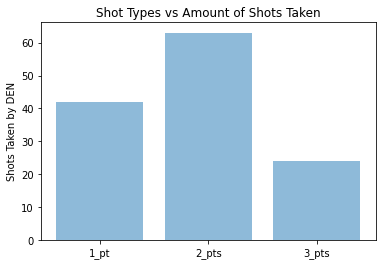

In [ ]:
x_axis = ('1_pt','2_pts','3_pts')
y_pos = np.arange(len(x_axis))
y_axis = [shots_1s_DEN.shape[0], shots_2s_DEN.shape[0], shots_3s_DEN.shape[0]]

plt.bar(y_pos, y_axis, align='center', alpha=0.5)
plt.xticks(y_pos, x_axis)
plt.ylabel('Shots Taken by DEN')
plt.title('Shot Types vs Amount of Shots Taken')

plt.show()
# Separate graph for made/miss for all ShotTypes



---


### **Notes from 07/01/20:**
det. interarrival time between each shotType & all shots *completed
Generate Histograms of Gaps bet. shots & gaps between shot Types (for one game and ALL games)
place these into separate vectors (df)
probability histogram (later)
Compare clippers to nuggets


---





## 11. Interarrival times between ALL 2pts & 3pts for LAC g1

In [ ]:
timesLAC = []

# Loop to retrieve interarrival times between every shot for LAC
for x in range(shots_all_23s_LAC.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  if x == 0:
    time = 720 - shots_all_23s_LAC.iloc[x, 0] 

  # end of quarter time minus next shot time in new quarter 
  elif shots_all_23s_LAC.iloc[x-1, 0] < shots_all_23s_LAC.iloc[x, 0]:
    time = (720 + shots_all_23s_LAC.iloc[x-1, 0]) - shots_all_23s_LAC.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_LAC.iloc[x-1, 0] == shots_all_23s_LAC.iloc[x, 0]:
  #  continue

  else:
    time = shots_all_23s_LAC.iloc[x-1, 0] - shots_all_23s_LAC.iloc[x, 0]
  timesLAC.append(time)
  # print(time)

print(timesLAC)

dict = {}
for val in range(len(timesLAC)):
  time = timesLAC[val]
  dict[time] = dict.get(time, 0) + 1
print(len(dict.keys()))

df = pd.DataFrame(timesLAC, columns=['InterArrival Times'])
df

[14, 65, 37, 22, 12, 20, 52, 36, 38, 37, 26, 28, 20, 26, 38, 32, 3, 28, 34, 24, 107, 41, 2, 32, 14, 22, 31, 19, 41, 50, 0, 61, 32, 6, 53, 32, 43, 3, 15, 48, 29, 16, 24, 17, 34, 4, 5, 42, 54, 32, 24, 72, 53, 23, 35, 33, 27, 6, 24, 5, 92, 33, 27, 30, 17, 37, 29, 27, 32, 57, 23, 29, 21, 27, 46, 38, 40, 24, 33, 57, 25, 58, 44, 161, 41, 7, 8, 8]
52


,InterArrival Times
0,14
1,65
2,37
3,22
4,12
...,...
83,161
84,41
85,7
86,8


## Histogram plot for InterArrival Time vs. Freq

Text(0.5, 1.0, "InterArrival Time vs. Frequency \nfor Game 1, LAC's 2 & 3 pts")

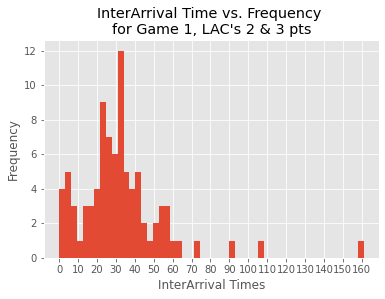

In [ ]:
import math

x_axis = timesLAC
plt.style.use('ggplot')
plt.hist(x_axis, bins= len(dict.keys()))
# plt.hist(x_axis, bins= int(math.sqrt(len(dict.keys()))))
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 10.0))

plt.ylabel('Frequency')
plt.xlabel('InterArrival Times')
plt.title('InterArrival Time vs. Frequency \nfor Game 1, LAC\'s 2 & 3 pts')

## 12. Interarrival times between ALL 2pts & 3pts for DEN g1




In [ ]:
timesDEN = []

# Loop to retrieve interarrival times between every shot for LAC
for x in range(shots_all_23s_DEN.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  if x == 0:
    time = 720 - shots_all_23s_DEN.iloc[x, 0] 

  # end of quarter time minus next shot time in new quarter 
  elif shots_all_23s_DEN.iloc[x-1, 0] < shots_all_23s_DEN.iloc[x, 0]:
    time = (720 + shots_all_23s_DEN.iloc[x-1, 0]) - shots_all_23s_DEN.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_DEN.iloc[x-1, 0] == shots_all_23s_DEN.iloc[x, 0]:
  #  continue

  else:
    time = shots_all_23s_DEN.iloc[x-1, 0] - shots_all_23s_DEN.iloc[x, 0]
  timesDEN.append(time)
  # print(time)

print(timesDEN)

[37, 7, 17, 36, 25, 19, 23, 27, 50, 70, 111, 20, 47, 34, 6, 53, 83, 53, 40, 25, 16, 22, 25, 27, 44, 21, 23, 41, 29, 40, 17, 25, 42, 60, 67, 13, 28, 22, 30, 64, 20, 16, 6, 31, 71, 44, 64, 41, 29, 29, 42, 33, 35, 36, 40, 41, 63, 41, 19, 55, 26, 5, 15, 31, 28, 18, 6, 58, 4, 11, 27, 22, 35, 23, 30, 28, 11, 44, 7, 72, 9, 38, 17, 21, 15, 0, 40]




---


### **Notes from 07/02/20:**
Do the following for 2pts and 3pts (both teams):
* First column: SecLeft
* Second Column: Quarter
* Third Column: Interarrival times amongst all shots ***
* Fourth Column: ShotType 
* 5th column: ShotOutcome


---

## 13. Export Data (Int. Arrival Times) amongst 2pts & 3pts for both teams g1

In [ ]:
LAC_data = LAC.loc[ (pd.isnull(LAC['ShotType']) == False) & (pd.isnull(LAC['HomePlay']) == False),
                   ['SecLeft', 'Quarter', 'ShotType', 'ShotOutcome', 'HomeTeam'] ]
                
LAC_data.insert(2, 'Int.Arrival Time', timesLAC)
# LAC_data.to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/LA Clippers Data.csv', index=False)    
LAC_data.head(20)                                                     

,SecLeft,Quarter,Int.Arrival Time,ShotType,ShotOutcome,HomeTeam
2903,706,1,14,2-pt jump shot,miss,LAC
2911,641,1,65,3-pt jump shot,make,LAC
2914,604,1,37,3-pt jump shot,miss,LAC
2917,582,1,22,2-pt jump shot,miss,LAC
2921,570,1,12,2-pt hook shot,miss,LAC
2925,550,1,20,2-pt layup,make,LAC
2929,498,1,52,2-pt jump shot,miss,LAC
2933,462,1,36,3-pt jump shot,miss,LAC
2936,424,1,38,3-pt jump shot,make,LAC
2941,387,1,37,2-pt jump shot,miss,LAC


In [ ]:
DEN_data = LAC.loc[ (pd.isnull(LAC['ShotType']) == False) & (pd.isnull(LAC['AwayPlay']) == False),
                   ['SecLeft', 'Quarter', 'ShotType', 'ShotOutcome', 'AwayTeam'] ]
                
DEN_data.insert(2, 'Int.Arrival Time', timesDEN)
# DEN_data.to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/DEN Nuggets Data.csv', index=False)             
# DEN_data.head(20)   


  
---
## Notes for later:
Finish gathering InterArrival times for the remaining ShotTypes


---




## 14.  Interarrival times between ALL 2pts for LAC g1

In [ ]:
times_2sLAC = []

# Loop to retrieve interarrival times between every shot for LAC
for x in range(shots_2s_LAC.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  if x == 0:
    time = 720 - shots_2s_LAC.iloc[x, 0] 

  # end of quarter time minus next shot time in new quarter 
  elif shots_2s_LAC.iloc[x-1, 0] < shots_2s_LAC.iloc[x, 0]:
    time = (720 + shots_2s_LAC.iloc[x-1, 0]) - shots_2s_LAC.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_2s_LAC.iloc[x-1, 0] == shots_2s_LAC.iloc[x, 0]:
  #  continue

  else:
    time = shots_2s_LAC.iloc[x-1, 0] - shots_2s_LAC.iloc[x, 0]
  times_2sLAC.append(time)
  # print(time)

print(times_2sLAC)

[14, 124, 12, 20, 52, 111, 26, 28, 84, 32, 3, 28, 34, 24, 107, 41, 2, 32, 14, 53, 19, 41, 50, 61, 38, 85, 43, 3, 15, 48, 45, 41, 34, 4, 5, 42, 54, 32, 149, 23, 35, 33, 57, 5, 92, 33, 111, 29, 27, 32, 57, 23, 29, 21, 111, 64, 33, 184, 202, 23]


## 15. Interarrival times between ALL 2pts for DEN g1

In [ ]:
times_2sDEN = []

# Loop to retrieve interarrival times between every shot for LAC
for x in range(shots_2s_DEN.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  if x == 0:
    time = 720 - shots_2s_DEN.iloc[x, 0] 
  
  # end of quarter time minus next shot time in new quarter 
  elif shots_2s_DEN.iloc[x-1, 0] < shots_2s_DEN.iloc[x, 0]:
    time = (720 + shots_2s_DEN.iloc[x-1, 0]) - shots_2s_DEN.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_DEN.iloc[x-1, 0] == shots_all_23s_DEN.iloc[x, 0]:
  #  continue

  else:
    time = shots_2s_DEN.iloc[x-1, 0] - shots_2s_DEN.iloc[x, 0]
  times_2sDEN.append(time)
  # print(time)

print(times_2sDEN)

[97, 25, 19, 23, 27, 120, 111, 20, 47, 34, 6, 189, 40, 25, 38, 25, 27, 44, 21, 23, 70, 57, 67, 60, 130, 94, 20, 16, 6, 31, 71, 44, 64, 41, 100, 33, 35, 36, 40, 41, 104, 74, 26, 5, 15, 31, 46, 6, 58, 4, 38, 57, 23, 30, 28, 11, 51, 72, 64, 21, 15, 0, 40]


## 16. Export Data (Int. Arrival Times) amongst 2pts for both teams g1

In [ ]:
LAC_data_2s = shots_all_LAC.loc[ (pd.isnull(shots_all_LAC['ShotType']) == False) & (shots_all_LAC['ShotType'].str.contains('2-pt')),
                            ['SecLeft', 'ShotType', 'ShotOutcome', 'HomeTeam'] ]
                
LAC_data_2s.insert(2, 'Int.Arrival Time', times_2sLAC)
# LAC_data_2s.to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/LA Clippers Data.csv', index=False)      
# LAC_data_2s.head(20) 

In [ ]:
DEN_data_2s = shots_all_DEN.loc[ (pd.isnull(shots_all_DEN['ShotType']) == False) & (shots_all_DEN['ShotType'].str.contains('2-pt')),
                         ['SecLeft', 'ShotType', 'ShotOutcome', 'AwayTeam'] ]
                
DEN_data_2s.insert(2, 'Int.Arrival Time', times_2sDEN)
# DEN_data_2s.to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/LA Clippers Data.csv', index=False)      
# DEN_data_2s.head(20) 

## 17. Interarrival times between ALL 3pts for LAC g1



In [ ]:
times_3sLAC = []

# Loop to retrieve interarrival times between every shot for LAC
for x in range(shots_3s_LAC.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  if x == 0:
    time = 720 - shots_3s_LAC.iloc[x, 0] 

  # end of quarter time minus next shot time in new quarter 
  elif shots_3s_LAC.iloc[x-1, 0] < shots_3s_LAC.iloc[x, 0]:
    time = (720 + shots_3s_LAC.iloc[x-1, 0]) - shots_3s_LAC.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_3s_LAC.iloc[x-1, 0] == shots_3s_LAC.iloc[x, 0]:
  #  continue

  else:
    time = shots_3s_LAC.iloc[x-1, 0] - shots_3s_LAC.iloc[x, 0]
  times_3sLAC.append(time)
  # print(time)

print(times_3sLAC)

[79, 37, 142, 38, 111, 26, 377, 141, 93, 59, 170, 40, 212, 72, 171, 6, 181, 30, 17, 282, 46, 78, 114, 25, 58, 205, 48, 8]


## 18. Interarrival times between ALL 3pts for DEN g1

In [ ]:
times_3sDEN = []

# Loop to retrieve interarrival times between every shot for LAC
for x in range(shots_3s_DEN.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  if x == 0:
    time = 720 - shots_3s_DEN.iloc[x, 0] 

  # end of quarter time minus next shot time in new quarter 
  elif shots_3s_DEN.iloc[x-1, 0] < shots_3s_DEN.iloc[x, 0]:
    time = (720 + shots_3s_DEN.iloc[x-1, 0]) - shots_3s_DEN.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_3s_DEN.iloc[x-1, 0] == shots_3s_DEN.iloc[x, 0]:
  #  continue

  else:
    time = shots_3s_DEN.iloc[x-1, 0] - shots_3s_DEN.iloc[x, 0]
  times_3sDEN.append(time)
  # print(time)

print(times_3sDEN)

[37, 7, 17, 180, 341, 83, 134, 203, 69, 42, 169, 13, 28, 52, 386, 29, 290, 60, 160, 97, 49, 171, 88, 38]


## 19. Export Data (Int. Arrival Times) amongst 3pts for both teams g1

In [ ]:
LAC_data_3s = shots_all_LAC.loc[ (pd.isnull(shots_all_LAC['ShotType']) == False) & (shots_all_LAC['ShotType'].str.contains('3-pt')),
                         ['SecLeft', 'ShotType', 'ShotOutcome', 'HomeTeam'] ]
                
LAC_data_3s.insert(2, 'Int.Arrival Time', times_3sLAC)
# LAC_data_3s.to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/LA Clippers Data.csv', index=False)      
# LAC_data_3s.head(20) 

In [ ]:
DEN_data_3s = shots_all_DEN.loc[ (pd.isnull(shots_all_DEN['ShotType']) == False) & (shots_all_DEN['ShotType'].str.contains('3-pt')),
                         ['SecLeft', 'ShotType', 'ShotOutcome', 'AwayTeam'] ]
                
DEN_data_3s.insert(2, 'Int.Arrival Time', times_3sDEN)
# DEN_data_3s.to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/LA Clippers Data.csv', index=False)      
# DEN_data_3s.head(20) 

## 20. Gather Data from ALL LAC vs. DEN Regular Games

In [ ]:
LAC_DEN = nba.loc[ ((nba['HomeTeam'] == 'LAC') & (nba['AwayTeam'] == 'DEN') | (nba['AwayTeam'] == 'LAC') & (nba['HomeTeam'] == 'DEN')) & (nba['GameType'] == 'regular') ]
LAC_DEN.shape
#LAC_DEN.head(20)

(1961, 40)

## 21. Split Data by Date and create separate Dataframes

In [ ]:
dates = []
dates.append(LAC_DEN.iloc[0,3])
# iterate through data to record dates of games
for date in range(LAC_DEN.shape[0]-1):
  if LAC_DEN.iloc[date+1, 3] != LAC_DEN.iloc[date, 3]:
    dates.append(LAC_DEN.iloc[date+1, 3] + ' -Starts at pos: ' + str(date+1))
print(dates)

['October 17 2018', 'December 22 2018 -Starts at pos: 511', 'January 10 2019 -Starts at pos: 975', 'February 24 2019 -Starts at pos: 1435']


In [ ]:
# LAC vs DEN Game 1
LAC1 = LAC_DEN.iloc[0:511]
# LAC vs DEN Game 2
LAC2 = LAC_DEN.iloc[511:975]
# LAC vs DEN Game 3
LAC3 = LAC_DEN.iloc[975:1435]
# LAC vs DEN Game 4
LAC4 = LAC_DEN.iloc[1435:]

# LAC4.head(10)

## Update: 07.10.20
## 22. Let's split the NBA data by ShotType for LAC vs DEN (regular game 1, OCT 17th)

In [ ]:
# Display the rows ONLY containing freethrows, 2pts and 3pts (all shots) taken by Both Teams 
shots_all_LD1 = LAC1.loc[ (pd.isnull(LAC['ShotType']) == False) | (pd.isnull(LAC1['FreeThrowOutcome']) == False),
                      ['SecLeft', 'ShotType', 'ShotOutcome', 'FreeThrowOutcome', 'HomePlay', 'HomeTeam', 'AwayTeam'] ] 

# Display the rows ONLY containing 2pts and 3pts taken by HomeTeam
shots_all_23s_LD1 = LAC1.loc[ (pd.isnull(LAC1['ShotType']) == False),
                      ['SecLeft', 'ShotType', 'ShotOutcome', 'HomePlay'] ] 

shots_all_23s_LD1.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 5/6]
for pos in range(shots_all_23s_LD1.shape[0]):
  if pd.isnull(shots_all_23s_LD1.iloc[pos, 3]) == False:
    shots_all_23s_LD1.iloc[pos, 3] = shots_all_LD1.iloc[pos, 5]
  else:
    shots_all_23s_LD1.iloc[pos, 3] = shots_all_LD1.iloc[pos, 6]


# Gather all 2pts made by HomeTeam and have it side by side with SecLeft 
shots_2s_LD1 = shots_all_LD1.loc[ (pd.isnull(shots_all_LD1['ShotType']) == False) & (shots_all_LD1['ShotType'].str.contains('2-pt')),
                         ['SecLeft', 'ShotType', 'ShotOutcome', 'HomePlay'] ]


# Gather all 3pts made by HomeTeam and have it side by side with SecLeft 
shots_3s_LD1 = shots_all_LD1.loc[ (pd.isnull(shots_all_LD1['ShotType']) == False) & (shots_all_LD1['ShotType'].str.contains('3-pt')),
                         ['SecLeft', 'ShotType', 'ShotOutcome', 'HomePlay'] ]

# Gather all 1pts made by HomeTeam and have it side by side with SecLeft 
shots_1s_LD1 = shots_all_LD1.loc[pd.isnull(shots_all_LD1['FreeThrowOutcome']) == False, 
                               ['SecLeft', 'FreeThrowOutcome', 'HomePlay'] ]


shots_2s_LD1.head(10)
# shots_3s_LD1.head(10)
# shots_1s_LD1.head(10)

# shots_all_23s_LD1.head(60) 
shots_all_23s_LD1.shape[0]

175

## 23. Interarrival times between ALL 2pts & 3pts for LAC & DEN g1

In [ ]:
timesLD1 = []

# Loop to retrieve interarrival times between every shot for LAC
for x in range(shots_all_23s_LD1.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  if x == 0:
    time = 720 - shots_all_23s_LD1.iloc[x, 0] 

  # end of quarter time minus next shot time in new quarter 
  elif shots_all_23s_LD1.iloc[x-1, 0] < shots_all_23s_LD1.iloc[x, 0]:
    time = (720 + shots_all_23s_LD1.iloc[x-1, 0]) - shots_all_23s_LD1.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_LD1.iloc[x-1, 0] == shots_all_23s_LD1.iloc[x, 0]:
  #  continue

  else:
    time = shots_all_23s_LD1.iloc[x-1, 0] - shots_all_23s_LD1.iloc[x, 0]
  timesLD1.append(time)
  # print(timeLD1)

print(timesLD1)

dict1 = {}
for val in range(len(timesLD1)):
  time = timesLD1[val]
  dict1[time] = dict1.get(time, 0) + 1
print(len(dict1.keys()))

df = pd.DataFrame(timesLD1, columns=['InterArrival Times'])
df

[14, 23, 7, 17, 18, 18, 19, 6, 16, 3, 9, 14, 6, 21, 31, 19, 17, 38, 15, 22, 26, 28, 20, 15, 11, 9, 29, 18, 14, 3, 17, 6, 5, 34, 14, 10, 73, 34, 19, 22, 2, 16, 16, 9, 5, 11, 11, 11, 20, 5, 14, 13, 28, 16, 21, 13, 0, 10, 41, 10, 19, 13, 6, 21, 17, 15, 10, 22, 20, 23, 3, 15, 19, 29, 29, 9, 7, 6, 18, 10, 7, 15, 19, 4, 5, 2, 40, 24, 20, 10, 6, 6, 20, 11, 13, 58, 14, 30, 23, 23, 18, 17, 24, 9, 20, 7, 6, 16, 8, 5, 29, 33, 30, 5, 28, 8, 19, 21, 9, 17, 15, 22, 29, 12, 15, 26, 6, 13, 44, 11, 12, 14, 5, 10, 5, 16, 15, 12, 16, 18, 6, 6, 38, 14, 4, 11, 11, 16, 8, 14, 19, 16, 23, 18, 12, 13, 15, 11, 32, 12, 7, 25, 47, 9, 38, 17, 21, 15, 0, 14, 26, 15, 7, 8, 8]
40


,InterArrival Times
0,14
1,23
2,7
3,17
4,18
...,...
170,26
171,15
172,7
173,8


Text(0.5, 1.0, "InterArrival Time vs. Frequency \nfor Game 1, LAC AND DEN's 2 & 3 pts")

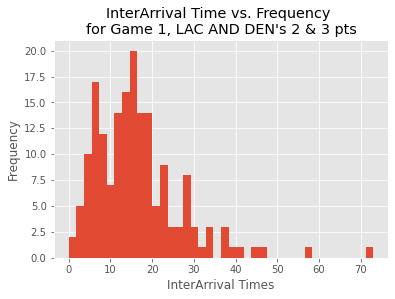

In [ ]:
import math

x_axis = timesLD1
plt.style.use('ggplot')
plt.hist(x_axis, bins= len(dict1.keys()))
# plt.hist(x_axis, bins= int(math.sqrt(len(dict.keys()))))
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 10.0))

plt.ylabel('Frequency')
plt.xlabel('InterArrival Times')
plt.title('InterArrival Time vs. Frequency \nfor Game 1, LAC AND DEN\'s 2 & 3 pts')

## 24. Export Data (Int. Arrival Times) amongst 2pts & 3pts for both teams g1

In [ ]:
LD1_data = shots_all_23s_LD1
                
LD1_data.insert(2, 'Int.Arrival Time', timesLD1)
#LD1_data.to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/LD1 Data.csv', index=False)
#LD1_data.loc[:,['Int.Arrival Time']].to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/Int. Times, LD1 Data.csv', index=False)           
LD1_data.head(20) 

,SecLeft,ShotType,Int.Arrival Time,ShotOutcome,Which Team?
2903,706,2-pt jump shot,14,miss,LAC
2905,683,3-pt jump shot,23,miss,DEN
2907,676,3-pt jump shot,7,miss,DEN
2909,659,3-pt jump shot,17,miss,DEN
2911,641,3-pt jump shot,18,make,LAC
2912,623,2-pt jump shot,18,miss,DEN
2914,604,3-pt jump shot,19,miss,LAC
2916,598,2-pt dunk,6,make,DEN
2917,582,2-pt jump shot,16,miss,LAC
2919,579,2-pt dunk,3,miss,DEN


## 25. Let's split the NBA data by ShotType for LAC vs DEN (regular game 2, DEC 22nd)

In [ ]:
# Display the rows ONLY containing freethrows, 2pts and 3pts (all shots) taken by Both Teams 
shots_all_LD2 = LAC2.loc[ (pd.isnull(LAC2['ShotType']) == False) | (pd.isnull(LAC2['FreeThrowOutcome']) == False),
                      ['SecLeft', 'ShotType', 'ShotOutcome', 'FreeThrowOutcome', 'HomePlay', 'HomeTeam', 'AwayTeam'] ] 

# Display the rows ONLY containing 2pts and 3pts taken by HomeTeam
shots_all_23s_LD2 = LAC2.loc[ (pd.isnull(LAC2['ShotType']) == False),
                      ['SecLeft', 'ShotType', 'ShotOutcome', 'HomePlay'] ] 

shots_all_23s_LD2.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 5/6]
for pos in range(shots_all_23s_LD2.shape[0]):
  if pd.isnull(shots_all_23s_LD2.iloc[pos, 3]) == False:
    shots_all_23s_LD2.iloc[pos, 3] = shots_all_LD1.iloc[pos, 5]
  else:
    shots_all_23s_LD2.iloc[pos, 3] = shots_all_LD1.iloc[pos, 6]


# Gather all 2pts made by HomeTeam and have it side by side with SecLeft 
shots_2s_LD2 = shots_all_LD2.loc[ (pd.isnull(shots_all_LD2['ShotType']) == False) & (shots_all_LD2['ShotType'].str.contains('2-pt')),
                         ['SecLeft', 'ShotType', 'ShotOutcome', 'HomePlay'] ]


# Gather all 3pts made by HomeTeam and have it side by side with SecLeft 
shots_3s_LD2 = shots_all_LD2.loc[ (pd.isnull(shots_all_LD2['ShotType']) == False) & (shots_all_LD2['ShotType'].str.contains('3-pt')),
                         ['SecLeft', 'ShotType', 'ShotOutcome', 'HomePlay'] ]

# Gather all 1pts made by HomeTeam and have it side by side with SecLeft 
shots_1s_LD2 = shots_all_LD2.loc[pd.isnull(shots_all_LD2['FreeThrowOutcome']) == False, 
                               ['SecLeft', 'FreeThrowOutcome', 'HomePlay'] ]


shots_2s_LD2.head(10)
# shots_3s_LD2.head(10)
# shots_1s_LD2.head(10)

# shots_all_23s_LD2.head(60) 
shots_all_23s_LD2.shape[0]

189

## 26. Interarrival times between ALL 2pts & 3pts for LAC & DEN g2

In [ ]:
timesLD2 = []

# Loop to retrieve interarrival times between every shot for LAC
for x in range(shots_all_23s_LD2.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  if x == 0:
    time = 720 - shots_all_23s_LD2.iloc[x, 0] 

  # end of quarter time minus next shot time in new quarter 
  elif shots_all_23s_LD2.iloc[x-1, 0] < shots_all_23s_LD2.iloc[x, 0]:
    time = (720 + shots_all_23s_LD2.iloc[x-1, 0]) - shots_all_23s_LD2.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_LD2.iloc[x-1, 0] == shots_all_23s_LD2.iloc[x, 0]:
  #  continue

  else:
    time = shots_all_23s_LD2.iloc[x-1, 0] - shots_all_23s_LD2.iloc[x, 0]
  timesLD2.append(time)
  # print(timeLD2)

print(timesLD2)

[20, 11, 12, 8, 16, 20, 11, 10, 5, 31, 12, 19, 7, 7, 10, 5, 20, 22, 9, 22, 25, 15, 10, 15, 13, 16, 25, 41, 22, 20, 12, 11, 13, 24, 25, 14, 13, 4, 12, 26, 25, 11, 41, 7, 15, 16, 14, 11, 72, 1, 22, 20, 14, 18, 9, 7, 21, 8, 5, 25, 5, 14, 16, 8, 17, 20, 14, 10, 13, 13, 28, 25, 6, 18, 6, 5, 19, 6, 17, 41, 19, 1, 15, 23, 0, 20, 12, 13, 19, 14, 24, 16, 21, 15, 18, 13, 15, 10, 6, 4, 20, 10, 13, 5, 23, 12, 11, 13, 6, 14, 13, 10, 15, 5, 30, 45, 16, 11, 12, 18, 11, 17, 5, 16, 5, 11, 8, 12, 11, 17, 31, 22, 8, 16, 13, 28, 7, 6, 24, 1, 8, 7, 12, 25, 13, 18, 12, 32, 6, 15, 9, 8, 23, 30, 11, 17, 19, 6, 12, 16, 2, 10, 11, 4, 18, 7, 15, 28, 9, 10, 9, 20, 26, 11, 38, 4, 15, 25, 12, 7, 12, 32, 14, 7, 25, 7, 11, 13, 33]


## 27. Export Data (Int. Arrival Times) amongst 2pts & 3pts for both teams g2

In [ ]:
LD2_data = shots_all_23s_LD2
                
LD2_data.insert(2, 'Int.Arrival Time', timesLD2)
#LD2_data.to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/LD2 Data.csv', index=False)
#LD2_data.loc[:,['Int.Arrival Time']].to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/Int. Times, LD2 Data.csv', index=False)            
LD2_data.head(20)  

,SecLeft,ShotType,Int.Arrival Time,ShotOutcome,Which Team?
283016,700,2-pt jump shot,20,make,LAC
283017,689,3-pt jump shot,11,make,DEN
283018,677,3-pt jump shot,12,miss,LAC
283020,669,3-pt jump shot,8,make,LAC
283021,653,2-pt jump shot,16,make,DEN
283022,633,2-pt jump shot,20,miss,LAC
283025,622,2-pt jump shot,11,miss,DEN
283028,612,3-pt jump shot,10,miss,DEN
283030,607,2-pt dunk,5,make,LAC
283032,576,2-pt layup,31,make,LAC


## 28. Let's split the NBA data by ShotType for LAC vs DEN (regular game 3, JAN 10th)


In [ ]:
# Display the rows ONLY containing freethrows, 2pts and 3pts (all shots) taken by Both Teams 
shots_all_LD3 = LAC3.loc[ (pd.isnull(LAC3['ShotType']) == False) | (pd.isnull(LAC3['FreeThrowOutcome']) == False),
                      ['SecLeft', 'ShotType', 'ShotOutcome', 'FreeThrowOutcome', 'HomePlay', 'HomeTeam', 'AwayTeam'] ] 

# Display the rows ONLY containing 2pts and 3pts taken by HomeTeam
shots_all_23s_LD3 = LAC3.loc[ (pd.isnull(LAC3['ShotType']) == False),
                      ['SecLeft', 'ShotType', 'ShotOutcome', 'HomePlay'] ] 

shots_all_23s_LD3.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 5/6]
for pos in range(shots_all_23s_LD3.shape[0]):
  if pd.isnull(shots_all_23s_LD3.iloc[pos, 3]) == False:
    shots_all_23s_LD3.iloc[pos, 3] = shots_all_LD1.iloc[pos, 5]
  else:
    shots_all_23s_LD3.iloc[pos, 3] = shots_all_LD1.iloc[pos, 6]


# Gather all 2pts made by HomeTeam and have it side by side with SecLeft 
shots_2s_LD3 = shots_all_LD3.loc[ (pd.isnull(shots_all_LD3['ShotType']) == False) & (shots_all_LD3['ShotType'].str.contains('2-pt')),
                         ['SecLeft', 'ShotType', 'ShotOutcome', 'HomePlay'] ]


# Gather all 3pts made by HomeTeam and have it side by side with SecLeft 
shots_3s_LD3 = shots_all_LD3.loc[ (pd.isnull(shots_all_LD3['ShotType']) == False) & (shots_all_LD3['ShotType'].str.contains('3-pt')),
                         ['SecLeft', 'ShotType', 'ShotOutcome', 'HomePlay'] ]

# Gather all 1pts made by HomeTeam and have it side by side with SecLeft 
shots_1s_LD3 = shots_all_LD3.loc[pd.isnull(shots_all_LD3['FreeThrowOutcome']) == False, 
                               ['SecLeft', 'FreeThrowOutcome', 'HomePlay'] ]


shots_2s_LD3.head(10)
# shots_3s_LD3.head(10)
# shots_1s_LD3.head(10)

# shots_all_23s_LD3.head(60) 
shots_all_23s_LD3.shape[0]

186

## 29. Interarrival times between ALL 2pts & 3pts for LAC & DEN g3

In [ ]:
timesLD3 = []

# Loop to retrieve interarrival times between every shot for LAC
for x in range(shots_all_23s_LD3.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  if x == 0:
    time = 720 - shots_all_23s_LD3.iloc[x, 0] 

  # end of quarter time minus next shot time in new quarter 
  elif shots_all_23s_LD3.iloc[x-1, 0] < shots_all_23s_LD3.iloc[x, 0]:
    time = (720 + shots_all_23s_LD3.iloc[x-1, 0]) - shots_all_23s_LD3.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_LD3.iloc[x-1, 0] == shots_all_23s_LD3.iloc[x, 0]:
  #  continue

  else:
    time = shots_all_23s_LD3.iloc[x-1, 0] - shots_all_23s_LD3.iloc[x, 0]
  timesLD3.append(time)
  # print(timeLD3)

print(timesLD3)

[20, 32, 10, 17, 37, 17, 23, 14, 10, 19, 10, 10, 10, 19, 24, 17, 25, 4, 14, 9, 24, 25, 6, 13, 34, 35, 8, 31, 25, 0, 11, 30, 10, 20, 44, 20, 7, 5, 22, 9, 12, 3, 5, 18, 3, 14, 28, 2, 4, 24, 16, 17, 10, 13, 26, 15, 26, 8, 16, 16, 4, 14, 16, 31, 9, 18, 20, 18, 9, 21, 24, 35, 26, 20, 15, 25, 13, 22, 17, 11, 28, 18, 20, 33, 19, 17, 11, 20, 23, 20, 20, 10, 21, 14, 5, 33, 9, 16, 6, 16, 22, 36, 5, 10, 10, 21, 1, 1, 1, 8, 29, 12, 10, 16, 6, 20, 14, 12, 20, 5, 21, 19, 17, 19, 20, 18, 27, 6, 19, 9, 3, 0, 0, 10, 19, 5, 14, 27, 8, 9, 9, 18, 10, 8, 5, 18, 17, 17, 19, 8, 3, 4, 10, 21, 9, 7, 15, 21, 6, 14, 16, 30, 20, 3, 9, 8, 14, 25, 3, 17, 24, 8, 12, 37, 24, 10, 25, 17, 13, 10, 0, 16, 7, 14, 13, 2]


## 30. Export Data (Int. Arrival Times) amongst 2pts & 3pts for both teams g3

In [ ]:
LD3_data = shots_all_23s_LD3
                
LD3_data.insert(2, 'Int.Arrival Time', timesLD3)
#LD3_data.to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/LD3 Data.csv', index=False)
#LD3_data.loc[:,['Int.Arrival Time']].to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/Int. Times, LD3 Data.csv', index=False)            
LD3_data.head(20)

,SecLeft,ShotType,Int.Arrival Time,ShotOutcome,Which Team?
299741,700,2-pt jump shot,20,make,DEN
299743,668,2-pt jump shot,32,miss,DEN
299745,658,2-pt hook shot,10,make,LAC
299747,641,2-pt jump shot,17,miss,DEN
299753,604,3-pt jump shot,37,make,DEN
299754,587,3-pt jump shot,17,make,LAC
299756,564,2-pt dunk,23,make,LAC
299757,550,2-pt layup,14,miss,DEN
299759,540,2-pt jump shot,10,make,DEN
299760,521,2-pt layup,19,make,LAC


## 31. Let's split the NBA data by ShotType for LAC vs DEN (regular game 4, FEB 24th)

In [ ]:
# Display the rows ONLY containing freethrows, 2pts and 3pts (all shots) taken by Both Teams 
shots_all_LD4 = LAC4.loc[ (pd.isnull(LAC4['ShotType']) == False) | (pd.isnull(LAC4['FreeThrowOutcome']) == False),
                      ['SecLeft', 'ShotType', 'ShotOutcome', 'FreeThrowOutcome', 'HomePlay', 'HomeTeam', 'AwayTeam'] ] 

# Display the rows ONLY containing 2pts and 3pts taken by HomeTeam
shots_all_23s_LD4 = LAC4.loc[ (pd.isnull(LAC4['ShotType']) == False),
                      ['SecLeft', 'ShotType', 'ShotOutcome', 'HomePlay'] ] 

shots_all_23s_LD4.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 5/6]
for pos in range(shots_all_23s_LD4.shape[0]):
  if pd.isnull(shots_all_23s_LD4.iloc[pos, 3]) == False:
    shots_all_23s_LD4.iloc[pos, 3] = shots_all_LD4.iloc[pos, 5]
  else:
    shots_all_23s_LD4.iloc[pos, 3] = shots_all_LD4.iloc[pos, 6]


# Gather all 2pts made by HomeTeam and have it side by side with SecLeft 
shots_2s_LD4 = shots_all_LD4.loc[ (pd.isnull(shots_all_LD4['ShotType']) == False) & (shots_all_LD4['ShotType'].str.contains('2-pt')),
                         ['SecLeft', 'ShotType', 'ShotOutcome', 'HomePlay'] ]


# Gather all 3pts made by HomeTeam and have it side by side with SecLeft 
shots_3s_LD4 = shots_all_LD4.loc[ (pd.isnull(shots_all_LD4['ShotType']) == False) & (shots_all_LD4['ShotType'].str.contains('3-pt')),
                         ['SecLeft', 'ShotType', 'ShotOutcome', 'HomePlay'] ]

# Gather all 1pts made by HomeTeam and have it side by side with SecLeft 
shots_1s_LD4 = shots_all_LD4.loc[pd.isnull(shots_all_LD4['FreeThrowOutcome']) == False, 
                               ['SecLeft', 'FreeThrowOutcome', 'HomePlay'] ]


shots_2s_LD4.head(10)
# shots_3s_LD4.head(10)
# shots_1s_LD4.head(10)

# shots_all_23s_LD4.head(60) 
shots_all_23s_LD4.shape[0]
shots_all_LD4
shots_all_23s_LD4

,SecLeft,ShotType,ShotOutcome,Which Team?
578830,697,2-pt jump shot,miss,DEN
578832,693,2-pt layup,miss,DEN
578834,681,2-pt layup,miss,LAC
578836,673,3-pt jump shot,miss,DEN
578838,653,3-pt jump shot,miss,LAC
...,...,...,...,...
579332,91,3-pt jump shot,miss,DEN
579334,80,2-pt jump shot,miss,LAC
579337,64,2-pt dunk,make,DEN
579340,54,3-pt jump shot,miss,LAC


## 32. Interarrival times between ALL 2pts & 3pts for LAC & DEN g4

In [ ]:
timesLD4 = []

# Loop to retrieve interarrival times between every shot for LAC
for x in range(shots_all_23s_LD4.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  if x == 0:
    time = 720 - shots_all_23s_LD4.iloc[x, 0] 

  # end of quarter time minus next shot time in new quarter 
  elif shots_all_23s_LD4.iloc[x-1, 0] < shots_all_23s_LD4.iloc[x, 0]:
    time = (720 + shots_all_23s_LD4.iloc[x-1, 0]) - shots_all_23s_LD4.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_LD4.iloc[x-1, 0] == shots_all_23s_LD4.iloc[x, 0]:
  #  continue

  else:
    time = shots_all_23s_LD4.iloc[x-1, 0] - shots_all_23s_LD4.iloc[x, 0]
  timesLD4.append(time)
  # print(timeLD3)

print(timesLD4)

[23, 4, 12, 8, 20, 12, 9, 17, 22, 17, 33, 22, 10, 24, 15, 18, 38, 20, 20, 11, 16, 7, 9, 17, 21, 20, 23, 15, 21, 63, 29, 6, 16, 16, 20, 13, 0, 5, 8, 7, 18, 13, 13, 25, 21, 19, 16, 17, 14, 16, 19, 10, 24, 12, 11, 20, 16, 18, 14, 7, 30, 26, 48, 5, 7, 24, 21, 15, 9, 11, 14, 10, 26, 16, 50, 31, 5, 16, 24, 9, 22, 4, 35, 13, 25, 12, 8, 15, 14, 15, 2, 8, 6, 14, 10, 14, 42, 11, 52, 1, 15, 6, 7, 9, 13, 9, 19, 5, 11, 17, 31, 11, 37, 15, 5, 24, 10, 4, 18, 49, 6, 13, 4, 16, 19, 29, 21, 18, 11, 30, 7, 3, 11, 11, 9, 17, 15, 35, 19, 19, 30, 28, 16, 25, 9, 15, 3, 5, 17, 14, 25, 12, 14, 33, 10, 2, 13, 19, 17, 10, 18, 15, 19, 16, 12, 11, 9, 14, 11, 16, 10, 23]


## 33. Export Data (Int. Arrival Times) amongst 2pts & 3pts for both teams g4

In [ ]:
LD4_data = shots_all_23s_LD4
                
LD4_data.insert(2, 'Int.Arrival Time', timesLD4)
#LD4_data.to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/LD4 Data.csv', index=False)
#LD4_data.loc[:,['Int.Arrival Time']].to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/Int. Times, LD4 Data.csv', index=False)            
LD4_data.head(20)

,SecLeft,ShotType,Int.Arrival Time,ShotOutcome,Which Team?
578830,697,2-pt jump shot,23,miss,DEN
578832,693,2-pt layup,4,miss,DEN
578834,681,2-pt layup,12,miss,LAC
578836,673,3-pt jump shot,8,miss,DEN
578838,653,3-pt jump shot,20,miss,LAC
578840,641,2-pt jump shot,12,make,DEN
578841,632,2-pt jump shot,9,miss,LAC
578843,615,2-pt layup,17,make,DEN
578844,593,2-pt jump shot,22,make,LAC
578845,576,2-pt layup,17,make,DEN


## 34. Gather ALL 82 games for ALL 30 teams

In [ ]:
# ATL, BRK, BOS, CHI, CHO, CLE, DAL, DEN, DET, GSW, HOU, IND, LAC, LAL, MEM, MIA, MIL, MIN, NOP, NYK, OKC, ORL, PHI, PHO, POR, SAC, SAS, TOR, UTA, WAS
LAC_all = nba.loc[ (nba['HomeTeam'] == 'LAC') | (nba['AwayTeam'] == 'LAC') & (nba['GameType'] == 'regular')]
LAC_all.head()

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,Shooter,ShotType,ShotOutcome,ShotDist,Assister,Blocker,FoulType,Fouler,Fouled,Rebounder,ReboundType,ViolationPlayer,ViolationType,TimeoutTeam,FreeThrowShooter,FreeThrowOutcome,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
2902,/boxscores/201810170LAC.html,regular,STAPLES Center Los Angeles California,October 17 2018,10:30 PM,DEN,1,720,DEN,Jump ball: N. Jokic vs. M. Gortat (T. Harris g...,0,LAC,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N. Jokic - DEN,M. Gortat - LAC,T. Harris
2903,/boxscores/201810170LAC.html,regular,STAPLES Center Los Angeles California,October 17 2018,10:30 PM,DEN,1,706,DEN,NaN,0,LAC,D. Gallinari misses 2-pt jump shot from 13 ft,0,D. Gallinari - LAC,2-pt jump shot,miss,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2904,/boxscores/201810170LAC.html,regular,STAPLES Center Los Angeles California,October 17 2018,10:30 PM,DEN,1,701,DEN,Defensive rebound by J. Murray,0,LAC,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Murray - DEN,defensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2905,/boxscores/201810170LAC.html,regular,STAPLES Center Los Angeles California,October 17 2018,10:30 PM,DEN,1,683,DEN,J. Murray misses 3-pt jump shot from 27 ft,0,LAC,NaN,0,J. Murray - DEN,3-pt jump shot,miss,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2906,/boxscores/201810170LAC.html,regular,STAPLES Center Los Angeles California,October 17 2018,10:30 PM,DEN,1,679,DEN,Offensive rebound by G. Harris,0,LAC,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G. Harris - DEN,offensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ATL_all = nba.loc[ (nba['HomeTeam'] == 'ATL') | (nba['AwayTeam'] == 'ATL') & (nba['GameType'] == 'regular')]
ATL_all.shape

(40708, 40)

In [ ]:
BRK_all = nba.loc[ (nba['HomeTeam'] == 'BRK') | (nba['AwayTeam'] == 'BRK') & (nba['GameType'] == 'regular')]
BRK_all.shape

(40562, 40)

In [ ]:
BOS_all = nba.loc[ (nba['HomeTeam'] == 'BOS') | (nba['AwayTeam'] == 'BOS') & (nba['GameType'] == 'regular')]
BOS_all.shape

(39709, 40)

In [ ]:
CHI_all = nba.loc[ (nba['HomeTeam'] == 'CHI') | (nba['AwayTeam'] == 'CHI') & (nba['GameType'] == 'regular')]
CHI_all.shape

(37216, 40)

In [ ]:
# ATL, BRK, BOS, CHI, CHO, CLE, DAL, DEN, DET, GSW, HOU, IND, LAC, LAL, MEM, MIA, MIL, MIN, NOP, NYK, OKC, ORL, PHI, PHO, POR, SAC, SAS, TOR, UTA, WAS
CHO_all = nba.loc[ (nba['HomeTeam'] == 'CHO') | (nba['AwayTeam'] == 'CHO') & (nba['GameType'] == 'regular')]
CHO_all.shape

(37669, 40)

In [ ]:
CLE_all = nba.loc[ (nba['HomeTeam'] == 'CLE') | (nba['AwayTeam'] == 'CLE') & (nba['GameType'] == 'regular')]
CLE_all.shape

(36589, 40)

In [ ]:
DAL_all = nba.loc[ (nba['HomeTeam'] == 'DAL') | (nba['AwayTeam'] == 'DAL') & (nba['GameType'] == 'regular')]
DAL_all.shape

(38432, 40)

In [ ]:
DEN_all = nba.loc[ (nba['HomeTeam'] == 'DEN') | (nba['AwayTeam'] == 'DEN') & (nba['GameType'] == 'regular')]
DEN_all.shape

(41310, 40)

In [ ]:
DET_all = nba.loc[ (nba['HomeTeam'] == 'DET') | (nba['AwayTeam'] == 'DET') & (nba['GameType'] == 'regular')]
DET_all.shape

(38853, 40)

In [ ]:
GSW_all = nba.loc[ (nba['HomeTeam'] == 'GSW') | (nba['AwayTeam'] == 'GSW') & (nba['GameType'] == 'regular')]
GSW_all.shape

(43117, 40)

In [ ]:
# Display the rows ONLY containing freethrows, 2pts and 3pts (all shots) taken by Both Teams 
shots_all_GSW = GSW_all.loc[ (pd.isnull(GSW_all['ShotType']) == False) | (pd.isnull(GSW_all['FreeThrowOutcome']) == False),
                      ['SecLeft', 'Quarter', 'ShotType', 'ShotOutcome', 'FreeThrowOutcome', 'HomePlay', 'HomeTeam', 'AwayTeam'] ] 

# Display the rows ONLY containing 2pts and 3pts taken by HomeTeam
shots_all_23s_GSW = GSW_all.loc[ (pd.isnull(GSW_all['ShotType']) == False),
                      ['SecLeft', 'Quarter', 'ShotType', 'ShotOutcome', 'HomePlay'] ] 

shots_all_23s_GSW.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 6/7]
for pos in range(shots_all_23s_GSW.shape[0]):
  if pd.isnull(shots_all_23s_GSW.iloc[pos, 4]) == False:
    shots_all_23s_GSW.iloc[pos, 4] = shots_all_GSW.iloc[pos, 6]
  else:
    shots_all_23s_GSW.iloc[pos, 4] = shots_all_GSW.iloc[pos, 7]


# Gather all 2pts made by HomeTeam and have it side by side with SecLeft 
shots_2s_GSW = shots_all_GSW.loc[ (pd.isnull(shots_all_GSW['ShotType']) == False) & (shots_all_GSW['ShotType'].str.contains('2-pt')),
                         ['SecLeft', 'Quarter', 'ShotType', 'ShotOutcome', 'HomePlay'] ]


shots_2s_GSW.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 6/7]
for pos in range(shots_2s_GSW.shape[0]):
  if pd.isnull(shots_2s_GSW.iloc[pos, 4]) == False:
    shots_2s_GSW.iloc[pos, 4] = shots_all_GSW.iloc[pos, 6]
  else:
    shots_2s_GSW.iloc[pos, 4] = shots_all_GSW.iloc[pos, 7]

# Gather all 3pts made by HomeTeam and have it side by side with SecLeft 
shots_3s_GSW = shots_all_GSW.loc[ (pd.isnull(shots_all_GSW['ShotType']) == False) & (shots_all_GSW['ShotType'].str.contains('3-pt')),
                         ['SecLeft', 'Quarter','ShotType', 'ShotOutcome', 'HomePlay'] ]

shots_3s_GSW.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 6/7]
for pos in range(shots_3s_GSW.shape[0]):
  if pd.isnull(shots_3s_GSW.iloc[pos, 4]) == False:
    shots_3s_GSW.iloc[pos, 4] = shots_all_GSW.iloc[pos, 6]
  else:
    shots_3s_GSW.iloc[pos, 4] = shots_all_GSW.iloc[pos, 7]

# Gather all 1pts made by HomeTeam and have it side by side with SecLeft 
shots_1s_GSW = shots_all_GSW.loc[pd.isnull(shots_all_GSW['FreeThrowOutcome']) == False, 
                               ['SecLeft', 'Quarter', 'FreeThrowOutcome', 'HomePlay'] ]

shots_1s_GSW.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 6/7]
for pos in range(shots_1s_GSW.shape[0]):
  if pd.isnull(shots_1s_GSW.iloc[pos, 3]) == False:
    shots_1s_GSW.iloc[pos, 3] = shots_all_GSW.iloc[pos, 6]
  else:
    shots_1s_GSW.iloc[pos, 3] = shots_all_GSW.iloc[pos, 7]


shots_all_23s_GSW.head(30)
# shots_3s_TOR.head(10)
# shots_1s_TOR.head(10)

# shots_all_23s_TOR.head(60) 
shots_all_23s_GSW.shape[0]
#shots_all_TOR.iloc[230:270]
#shots_all_23s_TOR.iloc[2500#:2530]

16674

In [ ]:
timesGSW = []

# Loop to retrieve interarrival times between every shot for LAC
sum = 0
locs = ""
for x in range(shots_all_23s_GSW.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  # CHANGE TO... shots_all_23s_TOR.iloc[x, 1] and [x+1, 1] checks for Q4 and Q1
  # if x == 0 or shots_all_23s_TOR.iloc[x-1, 1] == 4 or shots_all_23s_TOR.iloc[x-1, 1] == 5 and shots_all_23s_TOR.iloc[x, 1] == 1
  if (x == 0) or ( (shots_all_23s_GSW.iloc[x-1, 1] == 4 or shots_all_23s_GSW.iloc[x-1, 1] == 5) and shots_all_23s_GSW.iloc[x, 1] == 1):
    sum += 1 # should add up to 82
    locs += str(x) + ', '
    time = 720 - shots_all_23s_GSW.iloc[x, 0]

  # end of quarter time minus next shot time in new quarter 
  elif shots_all_23s_GSW.iloc[x-1, 0] < shots_all_23s_GSW.iloc[x, 0] and shots_all_23s_GSW.iloc[x, 1] == 5:
    time = (300 + shots_all_23s_GSW.iloc[x-1, 0]) - shots_all_23s_GSW.iloc[x, 0]

  elif shots_all_23s_GSW.iloc[x-1, 0] < shots_all_23s_GSW.iloc[x, 0]:
    time = (720 + shots_all_23s_GSW.iloc[x-1, 0]) - shots_all_23s_GSW.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_LD4.iloc[x-1, 0] == shots_all_23s_LD4.iloc[x, 0]:
  #  continue

  else:
    time = shots_all_23s_GSW.iloc[x-1, 0] - shots_all_23s_GSW.iloc[x, 0]
  timesGSW.append(time)
  
print(locs)
print(sum)

# Remove outliers to gain better visual of histograph
timesGSW2 = []
for time in timesGSW:
  if time < 100:
    timesGSW2.append(time)

dict1 = {}
for val in range(len(timesGSW2)):
  time = timesGSW2[val]
  dict1[time] = dict1.get(time, 0) + 1
  
print(len(dict1.keys()))

0, 186, 363, 542, 726, 902, 1082, 1246, 1422, 1610, 1802, 1978, 2146, 2327, 2500, 2690, 2871, 3051, 3215, 3379, 3569, 3755, 3940, 4111, 4296, 4481, 4674, 4861, 5046, 5206, 5408, 5579, 5755, 5928, 6110, 6270, 6453, 6616, 6788, 6980, 7181, 7364, 7542, 7707, 7883, 8056, 8227, 8416, 8605, 8786, 8956, 9136, 9312, 9500, 9690, 9877, 10065, 10252, 10420, 10596, 10786, 10964, 11140, 11324, 11504, 11678, 11836, 12018, 12208, 12381, 12549, 12731, 12894, 13105, 13254, 13442, 13623, 13804, 13971, 14145, 14327, 14527, 14714, 14907, 15108, 15286, 15459, 15628, 15792, 15982, 16156, 16328, 16512, 
93
74


Text(0.5, 1.0, 'InterArrival Time vs. Frequency \nfor ALL GSW Games, 2 & 3 pts')

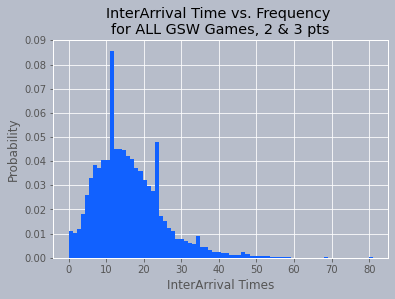

In [ ]:
import math

x_axis = timesGSW2
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.hist(x_axis, bins= int(len(dict1.keys())), density=True, facecolor='#1161FF') # '#FFD8C4' color of slide
# plt.hist(x_axis, bins= int(math.sqrt(len(dict.keys()))))
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 10.0))
plt.ylim((None, 0.09))
fig.patch.set_facecolor('#B7BDCA')
ax.set_facecolor('#B7BDCA')

plt.ylabel('Probability')
plt.xlabel('InterArrival Times')
plt.title('InterArrival Time vs. Frequency \nfor ALL GSW Games, 2 & 3 pts')

In [ ]:
times_2sGSW = []

# Loop to retrieve interarrival times between every shot for LAC
sum = 0
locs = ""
for x in range(shots_2s_GSW.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  # CHANGE TO... shots_all_23s_TOR.iloc[x, 1] and [x+1, 1] checks for Q4 and Q1
  # if x == 0 or shots_all_23s_TOR.iloc[x-1, 1] == 4 or shots_all_23s_TOR.iloc[x-1, 1] == 5 and shots_all_23s_TOR.iloc[x, 1] == 1
  if (x == 0) or ( (shots_2s_GSW.iloc[x-1, 1] == 4 or shots_2s_GSW.iloc[x-1, 1] == 5) and shots_2s_GSW.iloc[x, 1] == 1):
    sum += 1 # should add up to 82
    locs += str(x) + ', '
    time = 720 - shots_2s_GSW.iloc[x, 0] 

  # end of quarter time minus next shot time in new quarter 
  elif shots_2s_GSW.iloc[x-1, 0] < shots_2s_GSW.iloc[x, 0] and shots_2s_GSW.iloc[x, 1] == 5:
    time = (300 + shots_2s_GSW.iloc[x-1, 0]) - shots_2s_GSW.iloc[x, 0]

  elif shots_2s_GSW.iloc[x-1, 0] < shots_2s_GSW.iloc[x, 0]:
    time = (720 + shots_2s_GSW.iloc[x-1, 0]) - shots_2s_GSW.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_LD4.iloc[x-1, 0] == shots_all_23s_LD4.iloc[x, 0]:
  #  continue

  else:
    time = shots_2s_GSW.iloc[x-1, 0] - shots_2s_GSW.iloc[x, 0]
  times_2sGSW.append(time)
print(locs)
print(sum)

# Remove outliers to gain better visual of histograph
times_2sGSW2 = []
for time in times_2sGSW:
  if time < 100:
    times_2sGSW2.append(time)

dict1 = {}
for val in range(len(times_2sGSW2)):
  time = times_2sGSW2[val]
  dict1[time] = dict1.get(time, 0) + 1
print(len(dict1.keys()))

0, 123, 228, 331, 446, 547, 668, 773, 883, 998, 1106, 1215, 1307, 1403, 1497, 1605, 1717, 1838, 1946, 2032, 2142, 2254, 2377, 2486, 2620, 2734, 2859, 2967, 3077, 3197, 3316, 3431, 3539, 3658, 3767, 3868, 3989, 4087, 4209, 4340, 4463, 4585, 4707, 4811, 4922, 5021, 5124, 5249, 5359, 5473, 5584, 5686, 5806, 5931, 6038, 6152, 6276, 6403, 6507, 6608, 6722, 6831, 6942, 7064, 7177, 7280, 7382, 7485, 7592, 7702, 7802, 7927, 8017, 8144, 8224, 8349, 8457, 8570, 8676, 8784, 8906, 9020, 9146, 9260, 9370, 9498, 9606, 9721, 9834, 9949, 10058, 10141, 10258, 
93
100


Text(0.5, 1.0, 'InterArrival Time vs. Frequency \nfor ALL GSW Games, 2 pts')

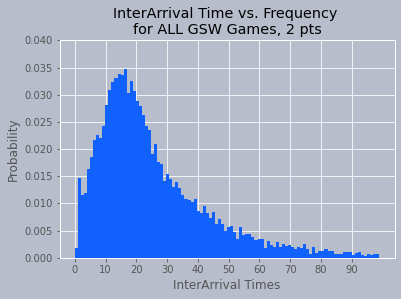

In [ ]:
import math

x_axis = times_2sGSW2
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.hist(x_axis, bins= int(len(dict1.keys())), density=True, facecolor='#1161FF') # '#FFD8C4' color of slide
# plt.hist(x_axis, bins= int(math.sqrt(len(dict.keys()))))
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 10.0))
plt.ylim((None, 0.04))
fig.patch.set_facecolor('#B7BDCA')
ax.set_facecolor('#B7BDCA')

plt.ylabel('Probability')
plt.xlabel('InterArrival Times')
plt.title('InterArrival Time vs. Frequency \nfor ALL GSW Games, 2 pts')

In [ ]:
times_3sGSW = []

# Loop to retrieve interarrival times between every shot for LAC
sum = 0
locs = ""
for x in range(shots_3s_GSW.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  # CHANGE TO... shots_all_23s_TOR.iloc[x, 1] and [x+1, 1] checks for Q4 and Q1
  # if x == 0 or shots_all_23s_TOR.iloc[x-1, 1] == 4 or shots_all_23s_TOR.iloc[x-1, 1] == 5 and shots_all_23s_TOR.iloc[x, 1] == 1
  if (x == 0) or ( (shots_3s_GSW.iloc[x-1, 1] == 4 or shots_3s_GSW.iloc[x-1, 1] == 5) and shots_3s_GSW.iloc[x, 1] == 1):
    sum += 1 # should add up to 82
    locs += str(x) + ', '
    time = 720 - shots_3s_GSW.iloc[x, 0] 

  # end of quarter time minus next shot time in new quarter 
  elif shots_3s_GSW.iloc[x-1, 0] < shots_3s_GSW.iloc[x, 0] and shots_3s_GSW.iloc[x, 1] == 5:
    time = (300 + shots_3s_GSW.iloc[x-1, 0]) - shots_3s_GSW.iloc[x, 0]

  elif shots_3s_GSW.iloc[x-1, 0] < shots_3s_GSW.iloc[x, 0]:
    time = (720 + shots_3s_GSW.iloc[x-1, 0]) - shots_3s_GSW.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_LD4.iloc[x-1, 0] == shots_all_23s_LD4.iloc[x, 0]:
  #  continue

  else:
    time = shots_3s_GSW.iloc[x-1, 0] - shots_3s_GSW.iloc[x, 0]
  times_3sGSW.append(time)
print(locs)
print(sum)

# Remove outliers to gain better visual of histograph
times_3sGSW2 = []
for time in times_3sGSW:
  if time < 150:
    times_3sGSW2.append(time)

dict1 = {}
for val in range(len(times_3sGSW2)):
  time = times_3sGSW2[val]
  dict1[time] = dict1.get(time, 0) + 1
print(len(dict1.keys()))

0, 63, 135, 211, 280, 355, 414, 473, 539, 612, 696, 763, 839, 924, 1003, 1085, 1154, 1213, 1269, 1347, 1427, 1501, 1563, 1625, 1676, 1747, 1815, 1894, 1969, 2009, 2092, 2148, 2216, 2270, 2343, 2402, 2464, 2529, 2579, 2640, 2718, 2779, 2835, 2896, 2961, 3035, 3103, 3167, 3246, 3313, 3372, 3450, 3506, 3569, 3652, 3725, 3789, 3849, 3913, 3988, 4064, 4133, 4198, 4260, 4327, 4398, 4454, 4533, 4616, 4679, 4747, 4804, 4877, 4961, 5030, 5093, 5166, 5234, 5295, 5361, 5421, 5507, 5568, 5647, 5738, 5788, 5853, 5907, 5958, 6033, 6098, 6187, 6254, 
93
148


Text(0.5, 1.0, 'InterArrival Time vs. Frequency \nfor ALL GSW Games, 3 pts')

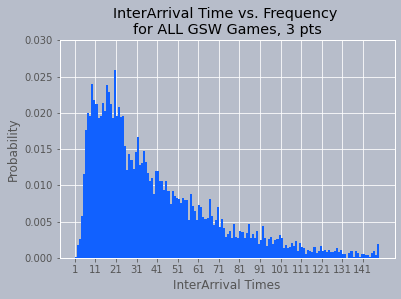

In [ ]:
import math

x_axis = times_3sGSW2
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.hist(x_axis, bins= int(len(dict1.keys())), density=True, facecolor='#1161FF') # '#FFD8C4' color of slide
# plt.hist(x_axis, bins= int(math.sqrt(len(dict.keys()))))
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 10.0))
plt.ylim((None, 0.03))
fig.patch.set_facecolor('#B7BDCA')
ax.set_facecolor('#B7BDCA')

plt.ylabel('Probability')
plt.xlabel('InterArrival Times')
plt.title('InterArrival Time vs. Frequency \nfor ALL GSW Games, 3 pts')

In [ ]:
GSW_23sdata = shots_all_23s_GSW
                
#GSW_23sdata.insert(2, 'Int.Arrival Time', timesGSW)
#GSW_23sdata.to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/GSW 23s Data.csv', index=False)
#GSW_data.loc[:,['Int.Arrival Time']].to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/Int. Times, GSW Data.csv', index=False)            
GSW_23sdata.head(20)

In [ ]:
HOU_all = nba.loc[ (nba['HomeTeam'] == 'HOU') | (nba['AwayTeam'] == 'HOU') & (nba['GameType'] == 'regular')]
HOU_all.shape

In [ ]:
# Display the rows ONLY containing freethrows, 2pts and 3pts (all shots) taken by Both Teams 
shots_all_HOU = HOU_all.loc[ (pd.isnull(HOU_all['ShotType']) == False) | (pd.isnull(HOU_all['FreeThrowOutcome']) == False),
                      ['SecLeft', 'Quarter', 'ShotType', 'ShotOutcome', 'FreeThrowOutcome', 'HomePlay', 'HomeTeam', 'AwayTeam'] ] 

# Display the rows ONLY containing 2pts and 3pts taken by HomeTeam
shots_all_23s_HOU = HOU_all.loc[ (pd.isnull(HOU_all['ShotType']) == False),
                      ['SecLeft', 'Quarter', 'ShotType', 'ShotOutcome', 'HomePlay'] ] 

shots_all_23s_HOU.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 6/7]
for pos in range(shots_all_23s_HOU.shape[0]):
  if pd.isnull(shots_all_23s_HOU.iloc[pos, 4]) == False:
    shots_all_23s_HOU.iloc[pos, 4] = shots_all_HOU.iloc[pos, 6]
  else:
    shots_all_23s_HOU.iloc[pos, 4] = shots_all_HOU.iloc[pos, 7]


# Gather all 2pts made by HomeTeam and have it side by side with SecLeft 
shots_2s_HOU = shots_all_HOU.loc[ (pd.isnull(shots_all_HOU['ShotType']) == False) & (shots_all_HOU['ShotType'].str.contains('2-pt')),
                         ['SecLeft', 'Quarter', 'ShotType', 'ShotOutcome', 'HomePlay'] ]


shots_2s_HOU.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 6/7]
for pos in range(shots_2s_HOU.shape[0]):
  if pd.isnull(shots_2s_HOU.iloc[pos, 4]) == False:
    shots_2s_HOU.iloc[pos, 4] = shots_all_HOU.iloc[pos, 6]
  else:
    shots_2s_HOU.iloc[pos, 4] = shots_all_HOU.iloc[pos, 7]

# Gather all 3pts made by HomeTeam and have it side by side with SecLeft 
shots_3s_HOU = shots_all_HOU.loc[ (pd.isnull(shots_all_HOU['ShotType']) == False) & (shots_all_HOU['ShotType'].str.contains('3-pt')),
                         ['SecLeft', 'Quarter','ShotType', 'ShotOutcome', 'HomePlay'] ]

shots_3s_HOU.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 6/7]
for pos in range(shots_3s_HOU.shape[0]):
  if pd.isnull(shots_3s_HOU.iloc[pos, 4]) == False:
    shots_3s_HOU.iloc[pos, 4] = shots_all_HOU.iloc[pos, 6]
  else:
    shots_3s_HOU.iloc[pos, 4] = shots_all_HOU.iloc[pos, 7]

# Gather all 1pts made by HomeTeam and have it side by side with SecLeft 
shots_1s_HOU = shots_all_HOU.loc[pd.isnull(shots_all_HOU['FreeThrowOutcome']) == False, 
                               ['SecLeft', 'Quarter', 'FreeThrowOutcome', 'HomePlay'] ]

shots_1s_HOU.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 6/7]
for pos in range(shots_1s_HOU.shape[0]):
  if pd.isnull(shots_1s_HOU.iloc[pos, 3]) == False:
    shots_1s_HOU.iloc[pos, 3] = shots_all_HOU.iloc[pos, 6]
  else:
    shots_1s_HOU.iloc[pos, 3] = shots_all_HOU.iloc[pos, 7]


shots_all_23s_HOU.head(30)
# shots_3s_TOR.head(10)
# shots_1s_TOR.head(10)

# shots_all_23s_TOR.head(60) 
shots_all_23s_HOU.shape[0]
#shots_all_TOR.iloc[230:270]
#shots_all_23s_TOR.iloc[2500#:2530]

In [ ]:
timesHOU = []

# Loop to retrieve interarrival times between every shot for LAC
sum = 0
locs = ""
for x in range(shots_all_23s_HOU.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  # CHANGE TO... shots_all_23s_TOR.iloc[x, 1] and [x+1, 1] checks for Q4 and Q1
  # if x == 0 or shots_all_23s_TOR.iloc[x-1, 1] == 4 or shots_all_23s_TOR.iloc[x-1, 1] == 5 and shots_all_23s_TOR.iloc[x, 1] == 1
  if (x == 0) or ( (shots_all_23s_HOU.iloc[x-1, 1] == 4 or shots_all_23s_HOU.iloc[x-1, 1] == 5) and shots_all_23s_HOU.iloc[x, 1] == 1):
    sum += 1 # should add up to 82
    locs += str(x) + ', '
    time = 720 - shots_all_23s_HOU.iloc[x, 0]

  # end of quarter time minus next shot time in new quarter 
  elif shots_all_23s_HOU.iloc[x-1, 0] < shots_all_23s_HOU.iloc[x, 0] and shots_all_23s_HOU.iloc[x, 1] == 5:
    time = (300 + shots_all_23s_HOU.iloc[x-1, 0]) - shots_all_23s_HOU.iloc[x, 0]

  elif shots_all_23s_HOU.iloc[x-1, 0] < shots_all_23s_HOU.iloc[x, 0]:
    time = (720 + shots_all_23s_HOU.iloc[x-1, 0]) - shots_all_23s_HOU.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_LD4.iloc[x-1, 0] == shots_all_23s_LD4.iloc[x, 0]:
  #  continue

  else:
    time = shots_all_23s_HOU.iloc[x-1, 0] - shots_all_23s_HOU.iloc[x, 0]
  timesHOU.append(time)
  
print(locs)
print(sum)

# Remove outliers to gain better visual of histograph
timesHOU2 = []
for time in timesHOU:
  if time < 150:
    timesHOU2.append(time)

dict1 = {}
for val in range(len(timesHOU2)):
  time = timesHOU2[val]
  dict1[time] = dict1.get(time, 0) + 1
  
print(len(dict1.keys()))

In [ ]:
import math

x_axis = timesHOU2
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.hist(x_axis, bins= int(len(dict1.keys())), density=True, cumulative=True)
# plt.hist(x_axis, bins= int(math.sqrt(len(dict.keys()))))
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 10.0))
fig.patch.set_facecolor('#B7BDCA')
ax.set_facecolor('#B7BDCA')

plt.ylabel('Probability')
plt.xlabel('InterArrival Times')
plt.title('InterArrival Time vs. Frequency \nfor ALL HOU Games, 2 & 3 pts')

In [ ]:
times_2sHOU = []

# Loop to retrieve interarrival times between every shot for LAC
sum = 0
locs = ""
for x in range(shots_2s_HOU.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  # CHANGE TO... shots_all_23s_TOR.iloc[x, 1] and [x+1, 1] checks for Q4 and Q1
  # if x == 0 or shots_all_23s_TOR.iloc[x-1, 1] == 4 or shots_all_23s_TOR.iloc[x-1, 1] == 5 and shots_all_23s_TOR.iloc[x, 1] == 1
  if (x == 0) or ( (shots_2s_HOU.iloc[x-1, 1] == 4 or shots_2s_HOU.iloc[x-1, 1] == 5) and shots_2s_HOU.iloc[x, 1] == 1):
    sum += 1 # should add up to 82
    locs += str(x) + ', '
    time = 720 - shots_2s_HOU.iloc[x, 0] 

  # end of quarter time minus next shot time in new quarter 
  elif shots_2s_HOU.iloc[x-1, 0] < shots_2s_HOU.iloc[x, 0] and shots_2s_HOU.iloc[x, 1] == 5:
    time = (300 + shots_2s_HOU.iloc[x-1, 0]) - shots_2s_HOU.iloc[x, 0]

  elif shots_2s_HOU.iloc[x-1, 0] < shots_2s_HOU.iloc[x, 0]:
    time = (720 + shots_2s_HOU.iloc[x-1, 0]) - shots_2s_HOU.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_LD4.iloc[x-1, 0] == shots_all_23s_LD4.iloc[x, 0]:
  #  continue

  else:
    time = shots_2s_HOU.iloc[x-1, 0] - shots_2s_HOU.iloc[x, 0]
  times_2sHOU.append(time)
print(locs)
print(sum)

# Remove outliers to gain better visual of histograph
times_2sHOU2 = []
for time in times_2sHOU:
  if time < 150:
    times_2sHOU2.append(time)

dict1 = {}
for val in range(len(times_2sHOU2)):
  time = times_2sHOU2[val]
  dict1[time] = dict1.get(time, 0) + 1
print(len(dict1.keys()))

In [ ]:
import math

x_axis = times_2sHOU2
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.hist(x_axis, bins= int(len(dict1.keys())), density=True, cumulative=True)
# plt.hist(x_axis, bins= int(math.sqrt(len(dict.keys()))))
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 10.0))
fig.patch.set_facecolor('#B7BDCA')
ax.set_facecolor('#B7BDCA')

plt.ylabel('Probability')
plt.xlabel('InterArrival Times')
plt.title('InterArrival Time vs. Frequency \nfor ALL HOU Games, 2 pts')

In [ ]:
times_3sHOU = []

# Loop to retrieve interarrival times between every shot for LAC
sum = 0
locs = ""
for x in range(shots_3s_HOU.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  # CHANGE TO... shots_all_23s_TOR.iloc[x, 1] and [x+1, 1] checks for Q4 and Q1
  # if x == 0 or shots_all_23s_TOR.iloc[x-1, 1] == 4 or shots_all_23s_TOR.iloc[x-1, 1] == 5 and shots_all_23s_TOR.iloc[x, 1] == 1
  if (x == 0) or ( (shots_3s_HOU.iloc[x-1, 1] == 4 or shots_3s_HOU.iloc[x-1, 1] == 5) and shots_3s_HOU.iloc[x, 1] == 1):
    sum += 1 # should add up to 82
    locs += str(x) + ', '
    time = 720 - shots_3s_HOU.iloc[x, 0] 

  # end of quarter time minus next shot time in new quarter 
  elif shots_3s_HOU.iloc[x-1, 0] < shots_3s_HOU.iloc[x, 0] and shots_3s_HOU.iloc[x, 1] == 5:
    time = (300 + shots_3s_HOU.iloc[x-1, 0]) - shots_3s_HOU.iloc[x, 0]

  elif shots_3s_HOU.iloc[x-1, 0] < shots_3s_HOU.iloc[x, 0]:
    time = (720 + shots_3s_HOU.iloc[x-1, 0]) - shots_3s_HOU.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_LD4.iloc[x-1, 0] == shots_all_23s_LD4.iloc[x, 0]:
  #  continue

  else:
    time = shots_3s_HOU.iloc[x-1, 0] - shots_3s_HOU.iloc[x, 0]
  times_3sHOU.append(time)
print(locs)
print(sum)

# Remove outliers to gain better visual of histograph
times_3sHOU2 = []
for time in times_3sHOU:
  if time < 150:
    times_3sHOU2.append(time)

dict1 = {}
for val in range(len(times_3sHOU2)):
  time = times_3sHOU2[val]
  dict1[time] = dict1.get(time, 0) + 1
print(len(dict1.keys()))

In [ ]:
import math

x_axis = times_3sHOU2
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.hist(x_axis, bins= int(len(dict1.keys())), density=True, cumulative=True)
# plt.hist(x_axis, bins= int(math.sqrt(len(dict.keys()))))
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 10.0))
fig.patch.set_facecolor('#B7BDCA')
ax.set_facecolor('#B7BDCA')

plt.ylabel('Probability')
plt.xlabel('InterArrival Times')
plt.title('InterArrival Time vs. Frequency \nfor ALL HOU Games, 3 pts')

In [ ]:
# ATL, BRK, BOS, CHI, CHO, CLE, DAL, DEN, DET, GSW, HOU, IND, LAC, LAL, MEM, MIA, MIL, MIN, NOP, NYK, OKC, ORL, PHI, PHO, POR, SAC, SAS, TOR, UTA, WAS
IND_all = nba.loc[ (nba['HomeTeam'] == 'IND') | (nba['AwayTeam'] == 'IND') & (nba['GameType'] == 'regular')]
IND_all.shape

### SKIP LAC

In [ ]:
LAL_all = nba.loc[ (nba['HomeTeam'] == 'LAL') | (nba['AwayTeam'] == 'LAL') & (nba['GameType'] == 'regular')]
LAL_all.shape

In [ ]:
MEM_all = nba.loc[ (nba['HomeTeam'] == 'MEM') | (nba['AwayTeam'] == 'MEM') & (nba['GameType'] == 'regular')]
MEM_all.shape

In [ ]:
MIA_all = nba.loc[ (nba['HomeTeam'] == 'MIA') | (nba['AwayTeam'] == 'MIA') & (nba['GameType'] == 'regular')]
MIA_all.shape

In [ ]:
MIL_all = nba.loc[ (nba['HomeTeam'] == 'MIL') | (nba['AwayTeam'] == 'MIL') & (nba['GameType'] == 'regular')]
MIL_all.shape

In [ ]:
MIN_all = nba.loc[ (nba['HomeTeam'] == 'MIN') | (nba['AwayTeam'] == 'MIN') & (nba['GameType'] == 'regular')]
MIN_all.shape

In [ ]:
# ATL, BRK, BOS, CHI, CHO, CLE, DAL, DEN, DET, GSW, HOU, IND, LAC, LAL, MEM, MIA, MIL, MIN, NOP, NYK, OKC, ORL, PHI, PHO, POR, SAC, SAS, TOR, UTA, WAS
NOP_all = nba.loc[ (nba['HomeTeam'] == 'NOP') | (nba['AwayTeam'] == 'NOP') & (nba['GameType'] == 'regular')]
NOP_all.shape

In [ ]:
NYK_all = nba.loc[ (nba['HomeTeam'] == 'NYK') | (nba['AwayTeam'] == 'NYK') & (nba['GameType'] == 'regular')]
NYK_all.shape

In [ ]:
OKC_all = nba.loc[ (nba['HomeTeam'] == 'OKC') | (nba['AwayTeam'] == 'OKC') & (nba['GameType'] == 'regular')]
OKC_all.shape

In [ ]:
ORL_all = nba.loc[ (nba['HomeTeam'] == 'ORL') | (nba['AwayTeam'] == 'ORL') & (nba['GameType'] == 'regular')]
ORL_all.shape

In [ ]:
PHI_all = nba.loc[ (nba['HomeTeam'] == 'PHI') | (nba['AwayTeam'] == 'PHI') & (nba['GameType'] == 'regular')]
PHI_all.shape

In [ ]:
PHO_all = nba.loc[ (nba['HomeTeam'] == 'PHO') | (nba['AwayTeam'] == 'PHO') & (nba['GameType'] == 'regular')]
PHO_all.shape

In [ ]:
POR_all = nba.loc[ (nba['HomeTeam'] == 'POR') | (nba['AwayTeam'] == 'POR') & (nba['GameType'] == 'regular')]
POR_all.shape

In [ ]:
# ATL, BRK, BOS, CHI, CHO, CLE, DAL, DEN, DET, GSW, HOU, IND, LAC, LAL, MEM, MIA, MIL, MIN, NOP, NYK, OKC, ORL, PHI, PHO, POR, SAC, SAS, TOR, UTA, WAS
SAC_all = nba.loc[ (nba['HomeTeam'] == 'SAC') | (nba['AwayTeam'] == 'SAC') & (nba['GameType'] == 'regular')]
SAC_all.shape

In [ ]:
SAS_all = nba.loc[ (nba['HomeTeam'] == 'SAS') | (nba['AwayTeam'] == 'SAS') & (nba['GameType'] == 'regular')]
SAS_all.shape

(38310, 40)

In [ ]:
# Display the rows ONLY containing freethrows, 2pts and 3pts (all shots) taken by Both Teams 
shots_all_SAS = SAS_all.loc[ (pd.isnull(SAS_all['ShotType']) == False) | (pd.isnull(SAS_all['FreeThrowOutcome']) == False),
                      ['SecLeft', 'Quarter', 'ShotType', 'ShotOutcome', 'FreeThrowOutcome', 'HomePlay', 'HomeTeam', 'AwayTeam'] ] 

# Display the rows ONLY containing 2pts and 3pts taken by HomeTeam
shots_all_23s_SAS = SAS_all.loc[ (pd.isnull(SAS_all['ShotType']) == False),
                      ['SecLeft', 'Quarter', 'ShotType', 'ShotOutcome', 'HomePlay'] ] 

shots_all_23s_SAS.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 6/7]
for pos in range(shots_all_23s_SAS.shape[0]):
  if pd.isnull(shots_all_23s_SAS.iloc[pos, 4]) == False:
    shots_all_23s_SAS.iloc[pos, 4] = shots_all_SAS.iloc[pos, 6]
  else:
    shots_all_23s_SAS.iloc[pos, 4] = shots_all_SAS.iloc[pos, 7]


# Gather all 2pts made by HomeTeam and have it side by side with SecLeft 
shots_2s_SAS = shots_all_SAS.loc[ (pd.isnull(shots_all_SAS['ShotType']) == False) & (shots_all_SAS['ShotType'].str.contains('2-pt')),
                         ['SecLeft', 'Quarter', 'ShotType', 'ShotOutcome', 'HomePlay'] ]


shots_2s_SAS.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 6/7]
for pos in range(shots_2s_SAS.shape[0]):
  if pd.isnull(shots_2s_SAS.iloc[pos, 4]) == False:
    shots_2s_SAS.iloc[pos, 4] = shots_all_SAS.iloc[pos, 6]
  else:
    shots_2s_SAS.iloc[pos, 4] = shots_all_SAS.iloc[pos, 7]

# Gather all 3pts made by HomeTeam and have it side by side with SecLeft 
shots_3s_SAS = shots_all_SAS.loc[ (pd.isnull(shots_all_SAS['ShotType']) == False) & (shots_all_SAS['ShotType'].str.contains('3-pt')),
                         ['SecLeft', 'Quarter','ShotType', 'ShotOutcome', 'HomePlay'] ]

shots_3s_SAS.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 6/7]
for pos in range(shots_3s_SAS.shape[0]):
  if pd.isnull(shots_3s_SAS.iloc[pos, 4]) == False:
    shots_3s_SAS.iloc[pos, 4] = shots_all_SAS.iloc[pos, 6]
  else:
    shots_3s_SAS.iloc[pos, 4] = shots_all_SAS.iloc[pos, 7]

# Gather all 1pts made by HomeTeam and have it side by side with SecLeft 
shots_1s_SAS = shots_all_SAS.loc[pd.isnull(shots_all_SAS['FreeThrowOutcome']) == False, 
                               ['SecLeft', 'Quarter', 'FreeThrowOutcome', 'HomePlay'] ]

shots_1s_SAS.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 6/7]
for pos in range(shots_1s_SAS.shape[0]):
  if pd.isnull(shots_1s_SAS.iloc[pos, 3]) == False:
    shots_1s_SAS.iloc[pos, 3] = shots_all_SAS.iloc[pos, 6]
  else:
    shots_1s_SAS.iloc[pos, 3] = shots_all_SAS.iloc[pos, 7]


shots_all_23s_SAS.head(30)
# shots_3s_TOR.head(10)
# shots_1s_TOR.head(10)

# shots_all_23s_TOR.head(60) 
shots_all_23s_SAS.shape[0]
#shots_all_TOR.iloc[230:270]
#shots_all_23s_TOR.iloc[2500#:2530]

15120

In [ ]:
timesSAS = []

# Loop to retrieve interarrival times between every shot for LAC
sum = 0
locs = ""
for x in range(shots_all_23s_SAS.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  # CHANGE TO... shots_all_23s_TOR.iloc[x, 1] and [x+1, 1] checks for Q4 and Q1
  # if x == 0 or shots_all_23s_TOR.iloc[x-1, 1] == 4 or shots_all_23s_TOR.iloc[x-1, 1] == 5 and shots_all_23s_TOR.iloc[x, 1] == 1
  if (x == 0) or ( (shots_all_23s_SAS.iloc[x-1, 1] == 4 or shots_all_23s_SAS.iloc[x-1, 1] == 5) and shots_all_23s_SAS.iloc[x, 1] == 1):
    sum += 1 # should add up to 82
    locs += str(x) + ', '
    time = 720 - shots_all_23s_SAS.iloc[x, 0]

  # end of quarter time minus next shot time in new quarter 
  elif shots_all_23s_SAS.iloc[x-1, 0] < shots_all_23s_SAS.iloc[x, 0] and shots_all_23s_SAS.iloc[x, 1] == 5:
    time = (300 + shots_all_23s_SAS.iloc[x-1, 0]) - shots_all_23s_SAS.iloc[x, 0]

  elif shots_all_23s_SAS.iloc[x-1, 0] < shots_all_23s_SAS.iloc[x, 0]:
    time = (720 + shots_all_23s_SAS.iloc[x-1, 0]) - shots_all_23s_SAS.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_LD4.iloc[x-1, 0] == shots_all_23s_LD4.iloc[x, 0]:
  #  continue

  else:
    time = shots_all_23s_SAS.iloc[x-1, 0] - shots_all_23s_SAS.iloc[x, 0]
  timesSAS.append(time)
  
print(locs)
print(sum)

# Remove outliers to gain better visual of histograph
timesSAS2 = []
for time in timesSAS:
  if time < 100:
    timesSAS2.append(time)

dict1 = {}
for val in range(len(timesSAS2)):
  time = timesSAS2[val]
  dict1[time] = dict1.get(time, 0) + 1
  
print(len(dict1.keys()))

0, 184, 361, 541, 725, 905, 1084, 1258, 1432, 1612, 1790, 1972, 2141, 2317, 2497, 2661, 2840, 3007, 3170, 3356, 3730, 3904, 4091, 4258, 4417, 4613, 4796, 4970, 5139, 5326, 5514, 5696, 5883, 6072, 6246, 6425, 6601, 6776, 6948, 7124, 7299, 7480, 7667, 7833, 8007, 8175, 8349, 8528, 8710, 8883, 9062, 9228, 9402, 9567, 9742, 9910, 10099, 10268, 10441, 10605, 10786, 10990, 11174, 11357, 11548, 11731, 11886, 12056, 12229, 12404, 12583, 12771, 12963, 13147, 13332, 13540, 13710, 13888, 14057, 14230, 14394, 14574, 14766, 14943, 
84
75


In [ ]:
SAS_23sdata = shots_all_23s_SAS
                
#TOR_23sdata.insert(2, 'Int.Arrival Time', timesTOR)
#TOR_23sdata.to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/TOR 23s Data.csv', index=False)
#LD4_data.loc[:,['Int.Arrival Time']].to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/Int. Times, LD4 Data.csv', index=False)            
#SAS_data.head(20)

Text(0.5, 1.0, 'InterArrival Time vs. Frequency \nfor ALL SAS Games, 2 & 3 pts')

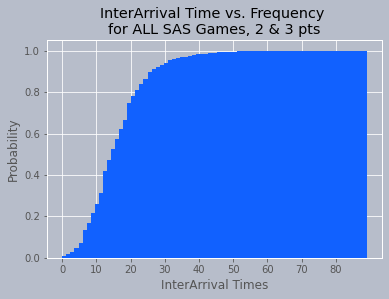

In [ ]:
import math

x_axis = timesSAS2
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.hist(x_axis, bins= int(len(dict1.keys())), density=True, facecolor='#1161FF', cumulative=True) # '#FFD8C4' color of slide
# plt.hist(x_axis, bins= int(math.sqrt(len(dict.keys()))))
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 10.0))
fig.patch.set_facecolor('#B7BDCA')
ax.set_facecolor('#B7BDCA')

plt.ylabel('Probability')
plt.xlabel('InterArrival Times')
plt.title('InterArrival Time vs. Frequency \nfor ALL SAS Games, 2 & 3 pts')

In [ ]:
times_2sSAS = []

# Loop to retrieve interarrival times between every shot for LAC
sum = 0
locs = ""
for x in range(shots_2s_SAS.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  # CHANGE TO... shots_all_23s_TOR.iloc[x, 1] and [x+1, 1] checks for Q4 and Q1
  # if x == 0 or shots_all_23s_TOR.iloc[x-1, 1] == 4 or shots_all_23s_TOR.iloc[x-1, 1] == 5 and shots_all_23s_TOR.iloc[x, 1] == 1
  if (x == 0) or ( (shots_2s_SAS.iloc[x-1, 1] == 4 or shots_2s_SAS.iloc[x-1, 1] == 5) and shots_2s_SAS.iloc[x, 1] == 1):
    sum += 1 # should add up to 82
    locs += str(x) + ', '
    time = 720 - shots_2s_SAS.iloc[x, 0] 

  # end of quarter time minus next shot time in new quarter 
  elif shots_2s_SAS.iloc[x-1, 0] < shots_2s_SAS.iloc[x, 0] and shots_2s_SAS.iloc[x, 1] == 5:
    time = (300 + shots_2s_SAS.iloc[x-1, 0]) - shots_2s_SAS.iloc[x, 0]

  elif shots_2s_SAS.iloc[x-1, 0] < shots_2s_SAS.iloc[x, 0]:
    time = (720 + shots_2s_SAS.iloc[x-1, 0]) - shots_2s_SAS.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_LD4.iloc[x-1, 0] == shots_all_23s_LD4.iloc[x, 0]:
  #  continue

  else:
    time = shots_2s_SAS.iloc[x-1, 0] - shots_2s_SAS.iloc[x, 0]
  times_2sSAS.append(time)
print(locs)
print(sum)

# Remove outliers to gain better visual of histograph
times_2sSAS2 = []
for time in times_2sSAS:
  if time < 100:
    times_2sSAS2.append(time)

dict1 = {}
for val in range(len(times_2sSAS2)):
  time = times_2sSAS2[val]
  dict1[time] = dict1.get(time, 0) + 1
print(len(dict1.keys()))

0, 140, 255, 390, 492, 600, 719, 850, 968, 1083, 1200, 1337, 1463, 1573, 1690, 1793, 1911, 2024, 2140, 2258, 2527, 2645, 2781, 2895, 3004, 3150, 3270, 3403, 3500, 3623, 3753, 3881, 4003, 4125, 4230, 4342, 4457, 4569, 4684, 4795, 4890, 4995, 5130, 5246, 5365, 5485, 5608, 5730, 5860, 5978, 6094, 6210, 6320, 6436, 6566, 6674, 6809, 6938, 7067, 7179, 7305, 7442, 7560, 7665, 7789, 7905, 8010, 8133, 8246, 8369, 8500, 8624, 8755, 8877, 9002, 9129, 9245, 9373, 9498, 9629, 9732, 9864, 9997, 10100, 
84
100


Text(0.5, 1.0, 'InterArrival Time vs. Frequency \nfor ALL SAS Games, 2 pts')

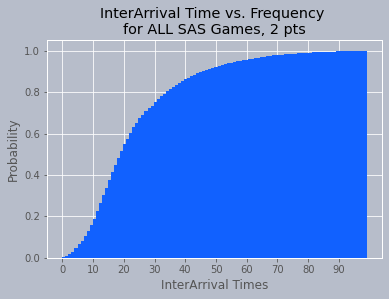

In [ ]:
import math

x_axis = times_2sSAS2
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.hist(x_axis, bins= int(len(dict1.keys())), density=True, facecolor='#1161FF', cumulative=True) # '#FFD8C4' color of slide
# plt.hist(x_axis, bins= int(math.sqrt(len(dict.keys()))))
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 10.0))
fig.patch.set_facecolor('#B7BDCA')
ax.set_facecolor('#B7BDCA')

plt.ylabel('Probability')
plt.xlabel('InterArrival Times')
plt.title('InterArrival Time vs. Frequency \nfor ALL SAS Games, 2 pts')

In [ ]:
times_3sSAS = []

# Loop to retrieve interarrival times between every shot for LAC
sum = 0
locs = ""
for x in range(shots_3s_SAS.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  # CHANGE TO... shots_all_23s_TOR.iloc[x, 1] and [x+1, 1] checks for Q4 and Q1
  # if x == 0 or shots_all_23s_TOR.iloc[x-1, 1] == 4 or shots_all_23s_TOR.iloc[x-1, 1] == 5 and shots_all_23s_TOR.iloc[x, 1] == 1
  if (x == 0) or ( (shots_3s_SAS.iloc[x-1, 1] == 4 or shots_3s_SAS.iloc[x-1, 1] == 5) and shots_3s_SAS.iloc[x, 1] == 1):
    sum += 1 # should add up to 82
    locs += str(x) + ', '
    time = 720 - shots_3s_SAS.iloc[x, 0] 

  # end of quarter time minus next shot time in new quarter 
  elif shots_3s_SAS.iloc[x-1, 0] < shots_3s_SAS.iloc[x, 0] and shots_3s_SAS.iloc[x, 1] == 5:
    time = (300 + shots_3s_SAS.iloc[x-1, 0]) - shots_3s_SAS.iloc[x, 0]

  elif shots_3s_SAS.iloc[x-1, 0] < shots_3s_SAS.iloc[x, 0]:
    time = (720 + shots_3s_SAS.iloc[x-1, 0]) - shots_3s_SAS.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_LD4.iloc[x-1, 0] == shots_all_23s_LD4.iloc[x, 0]:
  #  continue

  else:
    time = shots_3s_SAS.iloc[x-1, 0] - shots_3s_SAS.iloc[x, 0]
  times_3sSAS.append(time)
print(locs)
print(sum)

# Remove outliers to gain better visual of histograph
times_3sSAS2 = []
for time in times_3sSAS:
  if time < 150:
    times_3sSAS2.append(time)

dict1 = {}
for val in range(len(times_3sSAS2)):
  time = times_3sSAS2[val]
  dict1[time] = dict1.get(time, 0) + 1
print(len(dict1.keys()))

0, 44, 106, 151, 233, 305, 365, 408, 464, 529, 590, 635, 678, 744, 807, 868, 929, 983, 1030, 1098, 1203, 1259, 1310, 1363, 1413, 1463, 1526, 1567, 1639, 1703, 1761, 1815, 1880, 1947, 2016, 2083, 2144, 2207, 2264, 2329, 2409, 2485, 2537, 2587, 2642, 2690, 2741, 2798, 2850, 2905, 2968, 3018, 3082, 3131, 3176, 3236, 3290, 3330, 3374, 3426, 3481, 3548, 3614, 3692, 3759, 3826, 3876, 3923, 3983, 4035, 4083, 4147, 4208, 4270, 4330, 4411, 4465, 4515, 4559, 4601, 4662, 4710, 4769, 4843, 
84
150


Text(0.5, 1.0, 'InterArrival Time vs. Frequency \nfor ALL SAS Games, 3 pts')

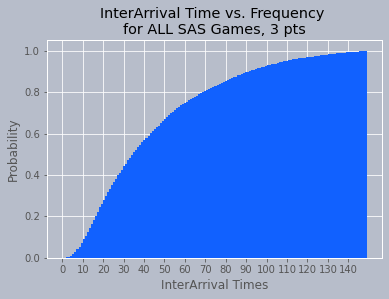

In [ ]:
import math

x_axis = times_3sSAS2
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.hist(x_axis, bins= int(len(dict1.keys())), density=True, facecolor='#1161FF', cumulative=True) # '#FFD8C4' color of slide
# plt.hist(x_axis, bins= int(math.sqrt(len(dict.keys()))))
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 10.0))
fig.patch.set_facecolor('#B7BDCA')
ax.set_facecolor('#B7BDCA')

plt.ylabel('Probability')
plt.xlabel('InterArrival Times')
plt.title('InterArrival Time vs. Frequency \nfor ALL SAS Games, 3 pts')

In [ ]:
TOR_all = nba.loc[ (nba['HomeTeam'] == 'TOR') | (nba['AwayTeam'] == 'TOR') & (nba['GameType'] == 'regular')]
TOR_all.shape

games = 0
for date in range(TOR_all.shape[0]):
  if TOR_all.iloc[date-1, 3] != TOR_all.iloc[date, 3]:
    games += 1
print(games)

95


In [ ]:
# Display the rows ONLY containing freethrows, 2pts and 3pts (all shots) taken by Both Teams 
shots_all_TOR = TOR_all.loc[ (pd.isnull(TOR_all['ShotType']) == False) | (pd.isnull(TOR_all['FreeThrowOutcome']) == False),
                      ['SecLeft', 'Quarter', 'ShotType', 'ShotOutcome', 'FreeThrowOutcome', 'HomePlay', 'HomeTeam', 'AwayTeam'] ] 

# Display the rows ONLY containing 2pts and 3pts taken by HomeTeam
shots_all_23s_TOR = TOR_all.loc[ (pd.isnull(TOR_all['ShotType']) == False),
                      ['SecLeft', 'Quarter', 'ShotType', 'ShotOutcome', 'HomePlay'] ] 

shots_all_23s_TOR.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 6/7]
for pos in range(shots_all_23s_TOR.shape[0]):
  if pd.isnull(shots_all_23s_TOR.iloc[pos, 4]) == False:
    shots_all_23s_TOR.iloc[pos, 4] = shots_all_TOR.iloc[pos, 6]
  else:
    shots_all_23s_TOR.iloc[pos, 4] = shots_all_TOR.iloc[pos, 7]


# Gather all 2pts made by HomeTeam and have it side by side with SecLeft 
shots_2s_TOR = shots_all_TOR.loc[ (pd.isnull(shots_all_TOR['ShotType']) == False) & (shots_all_TOR['ShotType'].str.contains('2-pt')),
                         ['SecLeft', 'Quarter', 'ShotType', 'ShotOutcome', 'HomePlay'] ]


shots_2s_TOR.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 6/7]
for pos in range(shots_2s_TOR.shape[0]):
  if pd.isnull(shots_2s_TOR.iloc[pos, 4]) == False:
    shots_2s_TOR.iloc[pos, 4] = shots_all_TOR.iloc[pos, 6]
  else:
    shots_2s_TOR.iloc[pos, 4] = shots_all_TOR.iloc[pos, 7]

# Gather all 3pts made by HomeTeam and have it side by side with SecLeft 
shots_3s_TOR = shots_all_TOR.loc[ (pd.isnull(shots_all_TOR['ShotType']) == False) & (shots_all_TOR['ShotType'].str.contains('3-pt')),
                         ['SecLeft', 'Quarter','ShotType', 'ShotOutcome', 'HomePlay'] ]

shots_3s_TOR.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 6/7]
for pos in range(shots_3s_TOR.shape[0]):
  if pd.isnull(shots_3s_TOR.iloc[pos, 4]) == False:
    shots_3s_TOR.iloc[pos, 4] = shots_all_TOR.iloc[pos, 6]
  else:
    shots_3s_TOR.iloc[pos, 4] = shots_all_TOR.iloc[pos, 7]

# Gather all 1pts made by HomeTeam and have it side by side with SecLeft 
shots_1s_TOR = shots_all_TOR.loc[pd.isnull(shots_all_TOR['FreeThrowOutcome']) == False, 
                               ['SecLeft', 'Quarter', 'FreeThrowOutcome', 'HomePlay'] ]

shots_1s_TOR.rename(columns={'HomePlay': 'Which Team?'}, inplace=True)

# this for loop iterates through df and assigns a team to 'Which Team' column
# using 'HomePlay' as an indicator and getting the value to be assigned from
# either 'HomeTeam' or 'AwayTeam' hence shots_all_LD4.iloc[pos, 6/7]
for pos in range(shots_1s_TOR.shape[0]):
  if pd.isnull(shots_1s_TOR.iloc[pos, 3]) == False:
    shots_1s_TOR.iloc[pos, 3] = shots_all_TOR.iloc[pos, 6]
  else:
    shots_1s_TOR.iloc[pos, 3] = shots_all_TOR.iloc[pos, 7]


shots_all_23s_TOR.head(30)
# shots_3s_TOR.head(10)
# shots_1s_TOR.head(10)

# shots_all_23s_TOR.head(60) 
#shots_all_23s_TOR.shape[0]
#shots_all_TOR.iloc[230:270]
#shots_all_23s_TOR.iloc[2500#:2530]

,SecLeft,Quarter,ShotType,ShotOutcome,Which Team?
5875,704,1,2-pt jump shot,miss,CLE
5877,684,1,2-pt jump shot,miss,TOR
5882,662,1,2-pt layup,make,TOR
5883,650,1,2-pt jump shot,miss,CLE
5886,637,1,3-pt jump shot,miss,CLE
5888,630,1,3-pt jump shot,miss,TOR
5890,607,1,3-pt jump shot,miss,CLE
5892,600,1,2-pt layup,make,CLE
5893,587,1,2-pt jump shot,miss,TOR
5895,581,1,2-pt layup,miss,TOR


In [ ]:
timesTOR = []

# Loop to retrieve interarrival times between every shot for LAC
sum = 0
locs = ""
for x in range(shots_all_23s_TOR.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  # CHANGE TO... shots_all_23s_TOR.iloc[x, 1] and [x+1, 1] checks for Q4 and Q1
  # if x == 0 or shots_all_23s_TOR.iloc[x-1, 1] == 4 or shots_all_23s_TOR.iloc[x-1, 1] == 5 and shots_all_23s_TOR.iloc[x, 1] == 1
  if (x == 0) or ( (shots_all_23s_TOR.iloc[x-1, 1] == 4 or shots_all_23s_TOR.iloc[x-1, 1] == 5) and shots_all_23s_TOR.iloc[x, 1] == 1):
    sum += 1 # should add up to 82
    locs += str(x) + ', '
    time = 720 - shots_all_23s_TOR.iloc[x, 0]

  # end of quarter time minus next shot time in new quarter 
  elif shots_all_23s_TOR.iloc[x-1, 0] < shots_all_23s_TOR.iloc[x, 0] and shots_all_23s_TOR.iloc[x, 1] == 5:
    time = (300 + shots_all_23s_TOR.iloc[x-1, 0]) - shots_all_23s_TOR.iloc[x, 0]

  elif shots_all_23s_TOR.iloc[x-1, 0] < shots_all_23s_TOR.iloc[x, 0]:
    time = (720 + shots_all_23s_TOR.iloc[x-1, 0]) - shots_all_23s_TOR.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_LD4.iloc[x-1, 0] == shots_all_23s_LD4.iloc[x, 0]:
  #  continue

  else:
    time = shots_all_23s_TOR.iloc[x-1, 0] - shots_all_23s_TOR.iloc[x, 0]
  timesTOR.append(time)
  
print(locs)
print(sum)

# Remove outliers to gain better visual of histograph
timesTOR2 = []
for time in timesTOR:
  if time < 100:
    timesTOR2.append(time)

dict1 = {}
for val in range(len(timesTOR2)):
  time = timesTOR2[val]
  dict1[time] = dict1.get(time, 0) + 1
  
print(len(dict1.keys()))

0, 177, 365, 551, 729, 917, 1097, 1275, 1450, 1629, 1795, 1968, 2155, 2327, 2503, 2664, 2847, 3010, 3190, 3373, 3751, 3927, 4110, 4277, 4470, 4635, 4817, 5010, 5193, 5377, 5562, 5734, 5906, 6295, 6468, 6642, 6819, 7001, 7183, 7349, 7545, 7719, 7899, 8071, 8230, 8403, 8583, 8778, 8933, 9103, 9286, 9458, 9644, 9848, 10016, 10203, 10357, 10532, 10723, 10914, 11087, 11266, 11459, 11627, 11794, 11973, 12145, 12335, 12512, 12679, 12851, 13024, 13206, 13382, 13565, 13735, 13919, 14068, 14249, 14421, 14604, 14775, 14959, 15144, 15326, 15496, 15663, 15817, 15985, 16161, 16329, 16506, 16668, 
93
79


In [ ]:
TOR_23sdata = shots_all_23s_TOR
                
#TOR_23sdata.insert(2, 'Int.Arrival Time', timesTOR)
#TOR_23sdata.to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/TOR 23s Data.csv', index=False)
#LD4_data.loc[:,['Int.Arrival Time']].to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/Int. Times, LD4 Data.csv', index=False)            
# TOR_23sdata.head(20)

Text(0.5, 1.0, 'InterArrival Time vs. Frequency \nfor ALL TOR Games, 2 & 3 pts')

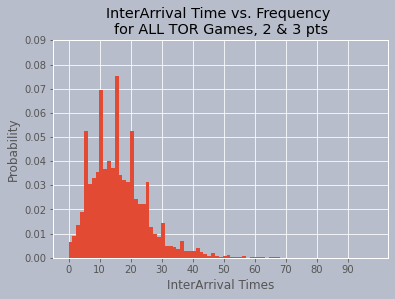

In [ ]:
import math

x_axis = timesTOR2
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.hist(x_axis, bins= int(len(dict1.keys())), density=True) # '#FFD8C4' color of slide
# plt.hist(x_axis, bins= int(math.sqrt(len(dict.keys()))))
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 10.0))
plt.ylim((None, 0.09))
fig.patch.set_facecolor('#B7BDCA')
ax.set_facecolor('#B7BDCA')

plt.ylabel('Probability')
plt.xlabel('InterArrival Times')
plt.title('InterArrival Time vs. Frequency \nfor ALL TOR Games, 2 & 3 pts')

In [ ]:
times_2sTOR = []

# Loop to retrieve interarrival times between every shot for LAC
sum = 0
locs = ""
for x in range(shots_2s_TOR.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  # CHANGE TO... shots_all_23s_TOR.iloc[x, 1] and [x+1, 1] checks for Q4 and Q1
  # if x == 0 or shots_all_23s_TOR.iloc[x-1, 1] == 4 or shots_all_23s_TOR.iloc[x-1, 1] == 5 and shots_all_23s_TOR.iloc[x, 1] == 1
  if (x == 0) or ( (shots_2s_TOR.iloc[x-1, 1] == 4 or shots_2s_TOR.iloc[x-1, 1] == 5) and shots_2s_TOR.iloc[x, 1] == 1):
    sum += 1 # should add up to 82
    locs += str(x) + ', '
    time = 720 - shots_2s_TOR.iloc[x, 0] 

  # end of quarter time minus next shot time in new quarter 
  elif shots_2s_TOR.iloc[x-1, 0] < shots_2s_TOR.iloc[x, 0] and shots_2s_TOR.iloc[x, 1] == 5:
    time = (300 + shots_2s_TOR.iloc[x-1, 0]) - shots_2s_TOR.iloc[x, 0]

  elif shots_2s_TOR.iloc[x-1, 0] < shots_2s_TOR.iloc[x, 0]:
    time = (720 + shots_2s_TOR.iloc[x-1, 0]) - shots_2s_TOR.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_LD4.iloc[x-1, 0] == shots_all_23s_LD4.iloc[x, 0]:
  #  continue

  else:
    time = shots_2s_TOR.iloc[x-1, 0] - shots_2s_TOR.iloc[x, 0]
  times_2sTOR.append(time)
print(locs)
print(sum)

# Remove outliers to gain better visual of histograph
times_2sTOR2 = []
for time in times_2sTOR:
  if time < 100:
    times_2sTOR2.append(time)

dict1 = {}
for val in range(len(times_2sTOR2)):
  time = times_2sTOR2[val]
  dict1[time] = dict1.get(time, 0) + 1
print(len(dict1.keys()))

0, 125, 253, 384, 482, 606, 722, 835, 953, 1082, 1181, 1299, 1416, 1535, 1639, 1736, 1860, 1955, 2069, 2207, 2423, 2530, 2648, 2739, 2864, 2966, 3066, 3194, 3310, 3429, 3552, 3660, 3781, 4031, 4150, 4259, 4377, 4505, 4615, 4720, 4844, 4952, 5072, 5187, 5291, 5399, 5507, 5612, 5703, 5808, 5938, 6051, 6169, 6297, 6417, 6529, 6621, 6734, 6854, 6975, 7098, 7225, 7333, 7432, 7524, 7624, 7731, 7842, 7949, 8042, 8156, 8254, 8372, 8476, 8592, 8695, 8820, 8908, 9006, 9110, 9236, 9337, 9454, 9568, 9689, 9801, 9896, 9993, 10091, 10189, 10298, 10407, 10510, 
93
100


Text(0.5, 1.0, 'InterArrival Time vs. Frequency \nfor ALL TOR Games, 2 pts')

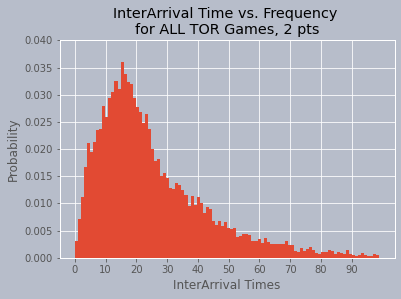

In [ ]:
import math

x_axis = times_2sTOR2
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.hist(x_axis, bins= int(len(dict1.keys())), density=True)
# plt.hist(x_axis, bins= int(math.sqrt(len(dict.keys()))))
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 10.0))
plt.ylim((None, 0.04))
fig.patch.set_facecolor('#B7BDCA')
ax.set_facecolor('#B7BDCA')

plt.ylabel('Probability')
plt.xlabel('InterArrival Times')
plt.title('InterArrival Time vs. Frequency \nfor ALL TOR Games, 2 pts')

In [ ]:
times_3sTOR = []

# Loop to retrieve interarrival times between every shot for LAC
sum = 0
locs = ""
for x in range(shots_3s_TOR.shape[0]):
  # .iloc[x, 0] gets us row x for col 0 (SecLeft in our case)

  # very start of quarter, interarrival time is 720 - next time
  # CHANGE TO... shots_all_23s_TOR.iloc[x, 1] and [x+1, 1] checks for Q4 and Q1
  # if x == 0 or shots_all_23s_TOR.iloc[x-1, 1] == 4 or shots_all_23s_TOR.iloc[x-1, 1] == 5 and shots_all_23s_TOR.iloc[x, 1] == 1
  if (x == 0) or ( (shots_3s_TOR.iloc[x-1, 1] == 4 or shots_3s_TOR.iloc[x-1, 1] == 5) and shots_3s_TOR.iloc[x, 1] == 1):
    sum += 1 # should add up to 82
    locs += str(x) + ', '
    time = 720 - shots_3s_TOR.iloc[x, 0] 

  # end of quarter time minus next shot time in new quarter 
  elif shots_3s_TOR.iloc[x-1, 0] < shots_3s_TOR.iloc[x, 0] and shots_3s_TOR.iloc[x, 1] == 5:
    time = (300 + shots_3s_TOR.iloc[x-1, 0]) - shots_3s_TOR.iloc[x, 0]

  elif shots_3s_TOR.iloc[x-1, 0] < shots_3s_TOR.iloc[x, 0]:
    time = (720 + shots_3s_TOR.iloc[x-1, 0]) - shots_3s_TOR.iloc[x, 0]

  # Do not record differences of 0 (for instance two back to back freethrows)
  # elif shots_all_23s_LD4.iloc[x-1, 0] == shots_all_23s_LD4.iloc[x, 0]:
  #  continue

  else:
    time = shots_3s_TOR.iloc[x-1, 0] - shots_3s_TOR.iloc[x, 0]
  times_3sTOR.append(time)
print(locs)
print(sum)

# Remove outliers to gain better visual of histograph
times_3sTOR2 = []
for time in times_3sTOR:
  if time < 150:
    times_3sTOR2.append(time)

dict1 = {}
for val in range(len(times_3sTOR2)):
  time = times_3sTOR2[val]
  dict1[time] = dict1.get(time, 0) + 1
print(len(dict1.keys()))

0, 52, 112, 167, 247, 311, 375, 440, 497, 547, 614, 669, 739, 792, 864, 928, 987, 1055, 1121, 1166, 1328, 1397, 1462, 1538, 1606, 1669, 1751, 1816, 1883, 1948, 2010, 2074, 2125, 2264, 2318, 2383, 2442, 2496, 2568, 2629, 2701, 2767, 2827, 2884, 2939, 3004, 3076, 3166, 3230, 3295, 3348, 3407, 3475, 3551, 3599, 3674, 3736, 3798, 3869, 3939, 3989, 4041, 4126, 4195, 4270, 4349, 4414, 4493, 4563, 4637, 4695, 4770, 4834, 4906, 4973, 5040, 5099, 5160, 5243, 5311, 5368, 5438, 5505, 5576, 5637, 5695, 5767, 5824, 5894, 5972, 6031, 6099, 6158, 
93
149


Text(0.5, 1.0, 'InterArrival Time vs. Frequency \nfor ALL TOR Games, 3 pts')

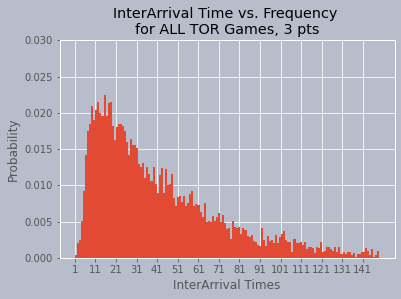

In [ ]:
import math

x_axis = times_3sTOR2
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.hist(x_axis, bins= int(len(dict1.keys())), density=True)
# plt.hist(x_axis, bins= int(math.sqrt(len(dict.keys()))))
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 10.0))
plt.ylim((None, 0.03))
fig.patch.set_facecolor('#B7BDCA')
ax.set_facecolor('#B7BDCA')

plt.ylabel('Probability')
plt.xlabel('InterArrival Times')
plt.title('InterArrival Time vs. Frequency \nfor ALL TOR Games, 3 pts')

In [ ]:
TOR_data = shots_all_23s_TOR
                
#TOR_data.insert(3, 'Int.Arrival Time', timesTOR)
#TOR_data.to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/TOR Data.csv', index=False)
#TOR_data.loc[:,['Int.Arrival Time']].to_csv('/content/drive/My Drive/Colab Notebooks/Research Data/Int. Times, TOR Data.csv', index=False)            
TOR_data.head(20)

In [ ]:
UTA_all = nba.loc[ (nba['HomeTeam'] == 'UTA') | (nba['AwayTeam'] == 'UTA') & (nba['GameType'] == 'regular')]
UTA_all.shape

In [ ]:
WAS_all = nba.loc[ (nba['HomeTeam'] == 'WAS') | (nba['AwayTeam'] == 'WAS') & (nba['GameType'] == 'regular')]
WAS_all.shape